# <h2 align=center> PROYECTO INDIVIDUAL Nº1 </h2>
# <h1 align=center>Recomendacion de Películas</h1>
        @autor: Lesmen Gerardo García Pernia

## Objetivos:

+ Crear un Modelo de Sistema de Recomendacion utilizando las caracteristicas de las películas para encontrar peliculas similares a las que ha visto un determinado usuario y le han gustado.

Estaremos utilizando un Sistema de Recomendacion Basado en el Analisis de Contenido <Br>
El objetivo de este tipo de modelo es analizar y seleccionar desde una gran Base de Datos, productos que sean similares a las caracteristicas de preferencia de un usuario. *"Seleccionar productos similares a aquellos que te gustan"*

https://www.futurespace.es/sistemas-de-recomendacion-de-contenidos-adivina-que-piensan-tus-clientes/

https://learn.microsoft.com/es-es/azure/architecture/solution-ideas/articles/build-content-based-recommendation-system-using-recommender


Definición de librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import ast
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

Fuente de datos

+ [Dataset](https://drive.google.com/drive/folders/1mfUVyP3jS-UMdKHERknkQ4gaCRCO2e1v): <Br>
Dos (2) Archivos de datos: movies_dataset.csv y credits.csv
+ [Diccionario de datos](https://docs.google.com/spreadsheets/d/1QkHH5er-74Bpk122tJxy_0D49pJMIwKLurByOfmxzho/edit#gid=0): <br/>
Diccionario con algunas descripciones de las columnas disponibles en el dataset.


# 1) Extracción Transformación y Carga (ETL)

### Cargar los 2 archivos de datos: movies_dataset.csv y credits.csv

In [8]:
df_Funcion_5 = pd.read_csv('DadatesClean/df_Funcion_5.csv')
df_Funcion_6 = pd.read_csv('DadatesClean/df_Funcion_6.csv')
df_movies = pd.read_csv('DadatesClean/df_movies.csv', sep=';')


## 1) Requerimientos Iniciales del Proyecto:

Revision inicial de los datos de "df_movies"

In [5]:
### Visualizar el dataSets de movies:
df_movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [6]:
### Validar los tipos de datos de las columnas y cantidad total:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
### Visualizar los datos númericos:
df_movies.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [8]:
### Valores nulos en cada columna de "df_movies"
df_movies.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [9]:
### Total de valores nulos en "df_movies"
print("Total de valores nulos en 'df_movies' = ", df_movies.isna().sum().sum())

Total de valores nulos en 'df_movies' =  105562


# Se procede a realizar los requerimiento iniciales del proyecto.

### Requerimiento Nro. 1

+ Algunos campos, como **`belongs_to_collection`**, **`production_companies`** y otros (ver diccionario de datos) están anidados, esto es o bien tienen un diccionario o una lista como valores en cada fila, ¡deberán desanidarlos para poder  y unirlos al dataset de nuevo hacer alguna de las consultas de la API! O bien buscar la manera de acceder a esos datos sin desanidarlos.

In [10]:
df_movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [11]:
### Visualizando el 3er registro del Dataset para visualizar sus datos
df_movies.iloc[2]

adult                                                                False
belongs_to_collection    {'id': 119050, 'name': 'Grumpy Old Men Collect...
budget                                                                   0
genres                   [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
homepage                                                               NaN
id                                                                   15602
imdb_id                                                          tt0113228
original_language                                                       en
original_title                                            Grumpier Old Men
overview                 A family wedding reignites the ancient feud be...
popularity                                                         11.7129
poster_path                               /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
production_companies     [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
production_countries     

Se verifica que el datasets de 'df_movies' tiene 5 columnas anidadas. <Br>Se procede a su visualizacion en detalle

### 1) Visualizando la columna: *`belongs_to_collection`*

In [12]:
### Visualizando la cadena en forma de diccionario de la columna "belongs_to_collection", de un determinado registro. 
fila_indice = 4  # Indice del registro o fila que se quiere visualizar.
Columna = 'belongs_to_collection'
CadenaDeDiccionario = df_movies.at[fila_indice, Columna]

print("1) Visualizando los datos horizontalmente:\n", "="*41)
print(CadenaDeDiccionario,"\n")

print("2) Visualizando los datos verticalmente:\n", "="*39)

### Convertir la cadena de caracteres en un diccionario usando eval()
DiccionarioDeDatos = eval(CadenaDeDiccionario)

### Ciclo for par avisualizar por clave valor, emulando un diccionario a partir de una cadena de caracteres
for key, value in DiccionarioDeDatos.items():
    print(f"{key}: {value}")
 
print("="*86)    
print(f"La columna '{Columna}', se refiere a la franquicia que realizó la película")
print("="*86)     


1) Visualizando los datos horizontalmente:
{'id': 96871, 'name': 'Father of the Bride Collection', 'poster_path': '/nts4iOmNnq7GNicycMJ9pSAn204.jpg', 'backdrop_path': '/7qwE57OVZmMJChBpLEbJEmzUydk.jpg'} 

2) Visualizando los datos verticalmente:
id: 96871
name: Father of the Bride Collection
poster_path: /nts4iOmNnq7GNicycMJ9pSAn204.jpg
backdrop_path: /7qwE57OVZmMJChBpLEbJEmzUydk.jpg
La columna 'belongs_to_collection', se refiere a la franquicia que realizó la película


De la columna "belongs_to_collection" nos interesa extraer el nombre de la Franquicia. Osea extraer la clave: name y su respectivo valor.

### 2) Visualizando la columna: *`genres`*

In [13]:
### Tomando el primer dato de la columna 'belongs_to_collection'
df_movies['genres'][3]

"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]"

In [14]:
### Visualizando la lista de diccionario de la columna "genres" de un determinado registro. 
fila_indice = 3  # Indice del registro o fila que se quiere visualizar.
Columna = 'genres'

lista_str = df_movies.at[fila_indice, Columna]
lista = ast.literal_eval(lista_str)
N = len(lista) # Cantidad de diccionarios a mostrar de la lista
for diccionario in lista[:N]:
    for key, value in diccionario.items():
        print(f"{key}: {value}")
    print("--------------------")
    
print("="*86)    
print(f"La columna '{Columna}', se refiere a los Generos de la película")
print("="*86)

id: 35
name: Comedy
--------------------
id: 18
name: Drama
--------------------
id: 10749
name: Romance
--------------------
La columna 'genres', se refiere a los Generos de la película


De la columna "genres" nos interesa extraer todos los Generos de la Película. En esta caso la película podria tener varios generos. Por lo tanto debemos extraer todos sus claves valor de: name.

### 3) Visualizando la columna: *`production_companies`*

In [15]:
### Tomando el primer dato de la columna 'belongs_to_collection'
df_movies['production_companies'][5]

"[{'name': 'Regency Enterprises', 'id': 508}, {'name': 'Forward Pass', 'id': 675}, {'name': 'Warner Bros.', 'id': 6194}]"

In [16]:
### Visualizando la lista de diccionario de la columna "production_companies" de un determinado registro. 
fila_indice = 5  # Indice del registro o fila que se quiere visualizar.
Columna = 'production_companies'

lista_str = df_movies.at[fila_indice, Columna]
lista = ast.literal_eval(lista_str)
N = len(lista) # Cantidad de diccionarios a mostrar de la lista
for diccionario in lista[:N]:
    for key, value in diccionario.items():
        print(f"{key}: {value}")
    print("--------------------")
    
print("="*86)    
print(f"La columna '{Columna}', se refiere a las Compañias Productoras de la película")
print("="*86)

name: Regency Enterprises
id: 508
--------------------
name: Forward Pass
id: 675
--------------------
name: Warner Bros.
id: 6194
--------------------
La columna 'production_companies', se refiere a las Compañias Productoras de la película


De la columna "production_companies" nos interesa extraer todos las Compañias de Produccion de la Película. En esta caso la película podria tener varias compañias de producción. Por lo tanto debemos extraer todos sus claves valor de: name.

### 4) Visualizando la columna: *`production_countries`*

In [17]:
### Tomando el primer dato de la columna 'belongs_to_collection'
df_movies['production_countries'][3500]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [18]:
### Visualizando la lista de diccionario de la columna "production_countries" de un determinado registro. 
fila_indice = 3500  # Indice del registro o fila que se quiere visualizar.
Columna = 'production_countries'

lista_str = df_movies.at[fila_indice, Columna]
lista = ast.literal_eval(lista_str)
N = len(lista) # Cantidad de diccionarios a mostrar de la lista
for diccionario in lista[:N]:
    for key, value in diccionario.items():
        print(f"{key}: {value}")
    print("--------------------")
    
print("="*86)    
print(f"La columna '{Columna}', se refiere a las Compañias Productoras de la película")
print("="*86)

iso_3166_1: US
name: United States of America
--------------------
La columna 'production_countries', se refiere a las Compañias Productoras de la película


De la columna "production_countries" nos interesa extraer todos las Paises de Produccion de la Película. En esta caso la película podria tener varias paises de producción. Por lo tanto debemos extraer todos sus claves valor de: name.

### 5) Visualizando la columna: *`spoken_languages`*

In [19]:
### Tomando el primer dato de la columna 'belongs_to_collection'
df_movies['spoken_languages'][2]

"[{'iso_639_1': 'en', 'name': 'English'}]"

In [20]:
### Visualizando la lista de diccionario de la columna "genres" de un determinado registro. 
fila_indice = 2  # Indice del registro o fila que se quiere visualizar.
Columna = 'spoken_languages'

lista_str = df_movies.at[fila_indice, Columna]
lista = ast.literal_eval(lista_str)
N = len(lista) # Cantidad de diccionarios a mostrar de la lista
for diccionario in lista[:N]:
    for key, value in diccionario.items():
        print(f"{key}: {value}")
    print("--------------------")
    
print("="*86)    
print(f"La columna '{Columna}', se refiere a la lista de Idiomas que se hablan en la película")
print("="*86)

iso_639_1: en
name: English
--------------------
La columna 'spoken_languages', se refiere a la lista de Idiomas que se hablan en la película


De la columna "spoken_languages" nos interesa extraer todos los Idiomas que se hablan en la . En esta caso en la película podrian hablarse varios idiomas. Por lo tanto debemos extraer todos sus claves valor de: name.

In [21]:
### Visualizando todas las columnas anidadas de un determinado registro o fila.
for i in (1,3,12,13,17):
    print(df_movies.iloc[2][i])

{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}
[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]
[{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_639_1': 'en', 'name': 'English'}]


### Desanidando las columnas anidadas

### Se procede a desanidar o separar el valor de la clave:'name' por ser el dato de mayor relevancia en estos campos; de las siguientes columnas:

<ul>
<li> 1) belongs_to_collection (Diccionario).</li>
<li> 2) genres (Lista de Diccionario). </li>
<li> 3) production_companies (Lista de Diccionario).</li>
<li> 4) production_countries (Lista de Diccionario).</li>
<li> 5) spoken_languages (Lista de Diccionario).</li>
</ul>

### Creación de Funciones para desanidar las columnas indicadas anteriormente:

Se procede a crear dos Funciones para Desanidar estas 5 columnas anidadas. La primera función ***(`Extraer_Valor_Dicc`)***, para extraer de la columna 'belongs_to_collection' sus campos en forma de diccionarios. Y la segunda función ***(`Extraer_Valor_List`)***, para extraer del resto de las columnas que contienen sus campos como una lista de diccionarios.

1 ) Funcion: `Extraer_Valor_Dicc`:<Br>
*Funcion para evaluar la columnas string pero en forma de diccionarios y extraer el valor asociado a la claves claves- valor

In [22]:
# Función para extraer el valor de la clave 'name', de la columna diccionario: 
def Extraer_Valor_Dicc(value):
    try:
        diccionario = ast.literal_eval(value)  #Evaluamos cada atributo como un diccionario de Python
        if isinstance(diccionario, dict): #Si el valor es un diccionario, extrae el valor asociado a la clave 'name', para luego retornarlo
            return diccionario.get('name', '')
    except (ValueError, SyntaxError): #Si no es posible evaluarlo como un diccionario, capturamos las excepciones (ValueError o SyntaxError) y devolvemos una cadena vacía.
        pass
    return np.nan  # En caso de no ser un diccionario, se devuelve una cadena vacía.

2  ) Funcion: `Extraer_Valor_Lista`:<Br>
*Funcion para evaluar la columnas string pero en forma de listas de diccionarios y extraer el valor asociado a la claves claves- valor

In [23]:
# Función para extraer el valor de la clave 'name', de la columna lista de diccionarios: genres
def Extraer_Valor_List(value):
    try:
        lista_de_diccionarios = ast.literal_eval(value) ##Evaluamos cada atributo como una lista de diccionario de Python
        if isinstance(lista_de_diccionarios, list): #Si el valor es una lista de diccionario, extrae el valor asociado a la 
                                                    #clave 'name' de cada diccionario y lo concatena en una sola cadena.
            names = [dic.get('name', '') for dic in lista_de_diccionarios if isinstance(dic, dict)]
            return ','.join(names)
    except (ValueError, SyntaxError):
        pass
    return np.nan  # Si no es posible evaluarlo como una lista de diccionarios, se devuelve un NaN

### Ejecución de las funciones para desanidar las columnas siguientes:

**`1) belongs_to_collection`**

In [24]:
### Desanidando por la clave-valor de: name
### Aplicar la función para extraer el valor 'name' y crear la nueva columna 'Franquicia'

Columna = 'belongs_to_collection'   # Columna a Desanidar
NuevaColumna = 'Franquicia'         # Nueva Columna

print(f"Cantidad de Valores Nulos de la Columna {Columna}, antes de desanidar= {df_movies[Columna].isna().sum()}")

df_movies[NuevaColumna] = df_movies[Columna].apply(Extraer_Valor_Dicc)

### Eliminando la columna: belongs_to_collection
df_movies.drop(columns=[Columna], inplace=True)

print(f"Cantidad de Valores Nulos de la Columna {NuevaColumna}, despúes de desanidar: {df_movies[NuevaColumna].isna().sum()}")

### Se procede a eliminar los valores nulos
#df_movies.dropna(subset=[NuevaColumna], inplace=True)
#print(f"Eliminando Valores Nulos. Cantidad de Valores Nulos de la Columna {NuevaColumna}: {df_movies[NuevaColumna].isna().sum()}")

df_movies[NuevaColumna]

Cantidad de Valores Nulos de la Columna belongs_to_collection, antes de desanidar= 40972
Cantidad de Valores Nulos de la Columna Franquicia, despúes de desanidar: 40975


0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
45461                               NaN
45462                               NaN
45463                               NaN
45464                               NaN
45465                               NaN
Name: Franquicia, Length: 45466, dtype: object

**`2) genes`**

In [25]:
### Desanidando por la clave-valor de: name
### Aplicar la función para extraer el valor 'name' y crear la nueva columna 'Generos'

Columna = 'genres'   # Columna a Desanidar
NuevaColumna = 'Generos'         # Nueva Columna

print(f"Cantidad de Valores Nulos de la Columna {Columna}, antes de desanidar= {df_movies[Columna].isna().sum()}")

df_movies[NuevaColumna] = df_movies[Columna].apply(Extraer_Valor_List)

print(f"Cantidad de Valores Nulos de la Columna {NuevaColumna}, despúes de desanidar: {df_movies[NuevaColumna].isna().sum()}")

### Eliminando la columna: genres
df_movies.drop(columns=[Columna], inplace=True)

### Se procede a eliminar los valores nulos
#df_movies.dropna(subset=[NuevaColumna], inplace=True)
#print(f"Eliminando Valores Nulos. Cantidad de Valores Nulos de la Columna {NuevaColumna}: {df_movies[NuevaColumna].isna().sum()}")

df_movies[NuevaColumna]

Cantidad de Valores Nulos de la Columna genres, antes de desanidar= 0
Cantidad de Valores Nulos de la Columna Generos, despúes de desanidar: 0


0         Animation,Comedy,Family
1        Adventure,Fantasy,Family
2                  Romance,Comedy
3            Comedy,Drama,Romance
4                          Comedy
                   ...           
45461                Drama,Family
45462                       Drama
45463       Action,Drama,Thriller
45464                            
45465                            
Name: Generos, Length: 45466, dtype: object

**`3) production_companies`**

In [26]:
### Desanidando por la clave-valor de: name
### Aplicar la función para extraer el valor 'name' y crear la nueva columna 'Productores'

Columna = 'production_companies'     # Columna a Desanidar
NuevaColumna = 'Productores'         # Nueva Columna

print(f"Cantidad de Valores Nulos de la Columna {Columna}, antes de desanidar= {df_movies[Columna].isna().sum()}")

df_movies[NuevaColumna] = df_movies[Columna].apply(Extraer_Valor_List)

### Eliminando la columna: genres
df_movies.drop(columns=[Columna], inplace=True)

print(f"Cantidad de Valores Nulos de la Columna {NuevaColumna}, despúes de desanidar: {df_movies[NuevaColumna].isna().sum()}")

### Se procede a eliminar los valores nulos
#df_movies.dropna(subset=[NuevaColumna], inplace=True)
#print(f"Eliminando Valores Nulos. Cantidad de Valores Nulos de la Columna {NuevaColumna}: {df_movies[NuevaColumna].isna().sum()}")

df_movies[NuevaColumna]

Cantidad de Valores Nulos de la Columna production_companies, antes de desanidar= 3
Cantidad de Valores Nulos de la Columna Productores, despúes de desanidar: 6


0                                  Pixar Animation Studios
1        TriStar Pictures,Teitler Film,Interscope Commu...
2                              Warner Bros.,Lancaster Gate
3                   Twentieth Century Fox Film Corporation
4                Sandollar Productions,Touchstone Pictures
                               ...                        
45461                                                     
45462                                          Sine Olivia
45463                              American World Pictures
45464                                            Yermoliev
45465                                                     
Name: Productores, Length: 45466, dtype: object

**`4) production_countries`**

In [27]:
### Desanidando por la clave-valor de: name
### Aplicar la función para extraer el valor 'name' y crear la nueva columna 'Paises'

Columna = 'production_countries'     # Columna a Desanidar
NuevaColumna = 'Paises'              # Nueva Columna

print(f"Cantidad de Valores Nulos de la Columna {Columna}, antes de desanidar= {df_movies[Columna].isna().sum()}")

df_movies[NuevaColumna] = df_movies[Columna].apply(Extraer_Valor_List)

### Eliminando la columna: genres
df_movies.drop(columns=[Columna], inplace=True)

print(f"Cantidad de Valores Nulos de la Columna {NuevaColumna}, despúes de desanidar: {df_movies[NuevaColumna].isna().sum()}")

### Se procede a eliminar los valores nulos
#df_movies.dropna(subset=[NuevaColumna], inplace=True)
#print(f"Eliminando Valores Nulos. Cantidad de Valores Nulos de la Columna {NuevaColumna}: {df_movies[NuevaColumna].isna().sum()}")

df_movies[NuevaColumna]

Cantidad de Valores Nulos de la Columna production_countries, antes de desanidar= 3
Cantidad de Valores Nulos de la Columna Paises, despúes de desanidar: 6


0        United States of America
1        United States of America
2        United States of America
3        United States of America
4        United States of America
                   ...           
45461                        Iran
45462                 Philippines
45463    United States of America
45464                      Russia
45465              United Kingdom
Name: Paises, Length: 45466, dtype: object

**`5) spoken_languages`**

In [28]:
### Desanidando por la clave-valor de: name
### Aplicar la función para extraer el valor 'name' y crear la nueva columna 'IdiomasH'

Columna = 'spoken_languages'           # Columna a Desanidar
NuevaColumna = 'IdiomasH'              # Nueva Columna (Idiomas Hablados en la Película)

print(f"Cantidad de Valores Nulos de la Columna {Columna}, antes de desanidar= {df_movies[Columna].isna().sum()}")

df_movies[NuevaColumna] = df_movies[Columna].apply(Extraer_Valor_List)

### Eliminando la columna: genres
df_movies.drop(columns=[Columna], inplace=True)

print(f"Cantidad de Valores Nulos de la Columna {NuevaColumna}, despúes de desanidar: {df_movies[NuevaColumna].isna().sum()}")

### Se procede a eliminar los valores nulos
#df_movies.dropna(subset=[NuevaColumna], inplace=True)
#print(f"Eliminando Valores Nulos. Cantidad de Valores Nulos de la Columna {NuevaColumna}: {df_movies[NuevaColumna].isna().sum()}")

df_movies[NuevaColumna]

Cantidad de Valores Nulos de la Columna spoken_languages, antes de desanidar= 6
Cantidad de Valores Nulos de la Columna IdiomasH, despúes de desanidar: 6


0                 English
1        English,Français
2                 English
3                 English
4                 English
               ...       
45461               فارسی
45462                    
45463             English
45464                    
45465             English
Name: IdiomasH, Length: 45466, dtype: object

In [29]:
### Información de Columnas y Filas del DataSets
print("Columnas del DataSets de Movies:\n\n",df_movies.columns,"\n")
print("Dimensiones del DataSets de Movies: ",df_movies.shape,"\n")
print("Informacion de las Columnas del DataSets:\n", df_movies.info())

Columnas del DataSets de Movies:

 Index(['adult', 'budget', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'Franquicia', 'Generos',
       'Productores', 'Paises', 'IdiomasH'],
      dtype='object') 

Dimensiones del DataSets de Movies:  (45466, 24) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              45466 non-null  object 
 1   budget             45466 non-null  object 
 2   homepage           7782 non-null   object 
 3   id                 45466 non-null  object 
 4   imdb_id            45449 non-null  object 
 5   original_language  45455 non-null  object 
 6   original_title     45466 non-null  object 
 7   overview   

### Requerimiento Nro. 2

+ Los valores nulos de los campos **`revenue`**, **`budget`** deben ser rellenados por el número **`0`**.

In [30]:
print("Cantidad de Valores Nulos de 'revenue':",df_movies['revenue'].isna().sum())
print("Cantidad de Valores Nulos de 'budget':",df_movies['budget'].isna().sum())

Cantidad de Valores Nulos de 'revenue': 6
Cantidad de Valores Nulos de 'budget': 0


In [31]:
# Se procede a sustituir los 6 valores nulos en la columna "revenue" y "budget", con cero (0).
df_movies['revenue'] = df_movies['revenue'].fillna(0)
df_movies['budget'] = df_movies['budget'].fillna(0)

# Otra forma de hacerlo: 
# df_movies2['revenue'].fillna(0,inplace=True)

# Validamos que ya no existan valores nulos:
print("Cantidad de Valores Nulos de 'revenue':",df_movies['revenue'].isna().sum())
print("Cantidad de Valores Nulos de 'budget':",df_movies['budget'].isna().sum())

Cantidad de Valores Nulos de 'revenue': 0
Cantidad de Valores Nulos de 'budget': 0


In [32]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              45466 non-null  object 
 1   budget             45466 non-null  object 
 2   homepage           7782 non-null   object 
 3   id                 45466 non-null  object 
 4   imdb_id            45449 non-null  object 
 5   original_language  45455 non-null  object 
 6   original_title     45466 non-null  object 
 7   overview           44512 non-null  object 
 8   popularity         45461 non-null  object 
 9   poster_path        45080 non-null  object 
 10  release_date       45379 non-null  object 
 11  revenue            45466 non-null  float64
 12  runtime            45203 non-null  float64
 13  status             45379 non-null  object 
 14  tagline            20412 non-null  object 
 15  title              45460 non-null  object 
 16  video              454

In [33]:
### La columna 'budget' esta definida como Objeto, pero es Númerico.
### Convertiendo la columna de tipo objeto a tipo numerico, y los que no sean numericos los convierte en NaN:

df_movies['budget'] = pd.to_numeric(df_movies['budget'], errors='coerce')

### Validano los cambios realizados a númerico y luego si se ha creado algun NaN:
print("Cantidad de Valores Nulos de 'budget':",df_movies['budget'].isna().sum())

Cantidad de Valores Nulos de 'budget': 3


In [34]:
# Se crearon 3 valores NaN. Se procede a sustituirlos por cero (0).
df_movies['budget'] = df_movies['budget'].fillna(0)

### Validando que ya no hay NaN
print("Cantidad de Valores Nulos de 'budget':",df_movies['budget'].isna().sum())

Cantidad de Valores Nulos de 'budget': 0


### Requerimiento Nro. 3

+ Los valores nulos del campo **`release_date`** deben eliminarse.

In [35]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              45466 non-null  object 
 1   budget             45466 non-null  float64
 2   homepage           7782 non-null   object 
 3   id                 45466 non-null  object 
 4   imdb_id            45449 non-null  object 
 5   original_language  45455 non-null  object 
 6   original_title     45466 non-null  object 
 7   overview           44512 non-null  object 
 8   popularity         45461 non-null  object 
 9   poster_path        45080 non-null  object 
 10  release_date       45379 non-null  object 
 11  revenue            45466 non-null  float64
 12  runtime            45203 non-null  float64
 13  status             45379 non-null  object 
 14  tagline            20412 non-null  object 
 15  title              45460 non-null  object 
 16  video              454

In [36]:
### La columna 'release_date' esta definida de tipo Object, segun el comando anterior.

### Validando si es o no, de tipo Objeto: (y observamos que es una fecha)
df_movies['release_date']

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
45461           NaN
45462    2011-11-17
45463    2003-08-01
45464    1917-10-21
45465    2017-06-09
Name: release_date, Length: 45466, dtype: object

In [37]:
### Validamos si tiene NaN:
print("Cantidad de Valores Nulos de 'release_date':",df_movies['release_date'].isna().sum())

Cantidad de Valores Nulos de 'release_date': 87


In [38]:
### Primero convertimos a datetime la columna 'release_date'
### Y forzamos a convertir en NaN a todos los valores que den error (errors='coerce).
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], errors='coerce')

### Validamos nuevamente la cantidad de valores NaN
print("Cantidad de Valores Nulos de 'release_date':",df_movies['release_date'].isna().sum())

Cantidad de Valores Nulos de 'release_date': 90


In [39]:
### Ahora si procedemos a eliminar los valores NaN = 87 +3 = 90, de la columna 'release_date', 
### ya que es una cantidad muy pequeña comparado con el total de registros
df_movies.dropna(subset=['release_date'], inplace=True)

#Verificamos que no existan NaT
print("Cantidad de Valores Nulos de 'release_date':",df_movies['release_date'].isna().sum())

Cantidad de Valores Nulos de 'release_date': 0


In [40]:
### Información de Columnas y Filas del DataSets
print("Columnas del DataSets de Movies:\n\n",df_movies.columns,"\n")
print("Dimensiones del DataSets de Movies: ",df_movies.shape,"\n")
print("Informacion de las Columnas del DataSets:\n", df_movies.info())

Columnas del DataSets de Movies:

 Index(['adult', 'budget', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'Franquicia', 'Generos',
       'Productores', 'Paises', 'IdiomasH'],
      dtype='object') 

Dimensiones del DataSets de Movies:  (45376, 24) 

<class 'pandas.core.frame.DataFrame'>
Index: 45376 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   adult              45376 non-null  object        
 1   budget             45376 non-null  float64       
 2   homepage           7766 non-null   object        
 3   id                 45376 non-null  object        
 4   imdb_id            45362 non-null  object        
 5   original_language  45365 non-null  object        
 6   original

### Requerimiento Nro. 4

+ De haber fechas, deberán tener el formato **`AAAA-mm-dd`**, además deberán crear la columna **`release_year`** donde extraerán el año de la fecha de estreno.

In [41]:
### Validan el tipo de columna 'release_date' y sus datos
print(df_movies['release_date'])
df_movies['release_date'].info()


0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
45460   1991-05-13
45462   2011-11-17
45463   2003-08-01
45464   1917-10-21
45465   2017-06-09
Name: release_date, Length: 45376, dtype: datetime64[ns]
<class 'pandas.core.series.Series'>
Index: 45376 entries, 0 to 45465
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
45376 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 709.0 KB


In [42]:
#Verificamos que todos los registros tengan el mismo formato AAAA-MM-DD
df_movies['release_date'] = pd.to_datetime(df_movies['release_date']).dt.strftime('%Y-%m-%d')

In [43]:
### Como efectivamente todos los registros de la columna 'release_date' tienen el mismo formato, 
### pasamos a crear la columna de años:

#Creamos la columna 'release_year' que va a contener el año de la columna 'release_date'
df_movies['Anio'] = pd.to_datetime(df_movies['release_date']).dt.year

### Validamos la nueva columna de 'release_year'
print(df_movies[['release_date','Anio']].head(5))
df_movies[['release_date','Anio']].tail(5)

  release_date  Anio
0   1995-10-30  1995
1   1995-12-15  1995
2   1995-12-22  1995
3   1995-12-22  1995
4   1995-02-10  1995


,release_date,Anio
45460,1991-05-13,1991
45462,2011-11-17,2011
45463,2003-08-01,2003
45464,1917-10-21,1917
45465,2017-06-09,2017


In [44]:
### Información de Columnas y Filas del DataSets
print("Columnas del DataSets de Movies:\n\n",df_movies.columns,"\n")
print("Dimensiones del DataSets de Movies: ",df_movies.shape,"\n")
print("Informacion de las Columnas del DataSets:\n", df_movies.info())

Columnas del DataSets de Movies:

 Index(['adult', 'budget', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'Franquicia', 'Generos',
       'Productores', 'Paises', 'IdiomasH', 'Anio'],
      dtype='object') 

Dimensiones del DataSets de Movies:  (45376, 25) 

<class 'pandas.core.frame.DataFrame'>
Index: 45376 entries, 0 to 45465
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              45376 non-null  object 
 1   budget             45376 non-null  float64
 2   homepage           7766 non-null   object 
 3   id                 45376 non-null  object 
 4   imdb_id            45362 non-null  object 
 5   original_language  45365 non-null  object 
 6   original_title     45376 non-null  object 
 7   overview

### Requerimiento Nro. 5

+ Crear la columna con el retorno de inversión, llamada **`return`** con los campos **`revenue`** y **`budget`**, dividiendo estas dos últimas **`revenue / budget`**, cuando no hay datos disponibles para calcularlo, deberá tomar el valor **`0`**.

In [45]:
### Validando que no hay NaN, en ninguna de las dos columnas:
print(df_movies['budget'].isna().sum())
df_movies['revenue'].isna().sum()

0


0

In [46]:
### Validando datos
df_movies[['budget','revenue']].describe()

,budget,revenue
count,4.537600e+04,4.537600e+04
mean,4.232604e+06,1.123010e+07
std,1.743986e+07,6.438996e+07
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,3.800000e+08,2.787965e+09


Se puede observar que ambas columnas tienen valores en ceros (0)

In [47]:
### Se realiza esta conversion para detectar la existencia de algun dato, con un posible error. (Por si acaso !!!!)
df_movies['budget'] = pd.to_numeric(df_movies['budget'], errors='coerce')
df_movies['revenue'] = pd.to_numeric(df_movies['revenue'], errors='coerce')

In [48]:
### Creando la columna con la formula del retorno de inversión 'return'
df_movies['return'] = df_movies['revenue']/df_movies['budget']

#df_movies['return'] = df_movies.apply(lambda x_return: 0 if x_return['budget'] == 0 else (x_return['revenue'] / x_return['budget']), axis=1)

### Eliminando valores NaN
df_movies['return'].fillna(0, inplace=True)

### Visualizando las columnas
print(df_movies[['revenue', 'budget','return']].head(10))
df_movies[['revenue', 'budget','return']].tail(10)


       revenue      budget     return
0  373554033.0  30000000.0  12.451801
1  262797249.0  65000000.0   4.043035
2          0.0         0.0   0.000000
3   81452156.0  16000000.0   5.090760
4   76578911.0         0.0        inf
5  187436818.0  60000000.0   3.123947
6          0.0  58000000.0   0.000000
7          0.0         0.0   0.000000
8   64350171.0  35000000.0   1.838576
9  352194034.0  58000000.0   6.072311


,revenue,budget,return
45455,0.0,0.0,0.0
45456,0.0,0.0,0.0
45457,0.0,0.0,0.0
45458,0.0,0.0,0.0
45459,0.0,0.0,0.0
45460,0.0,0.0,0.0
45462,0.0,0.0,0.0
45463,0.0,0.0,0.0
45464,0.0,0.0,0.0
45465,0.0,0.0,0.0


In [49]:
### En el caso de haber divisiones por CERO, que son colocadas como: inf ( Infinito), debemos corregirlo.

### Se procede a convertir los valores inf (INFINITOS) a CERO:
df_movies['return'] = df_movies['return'].replace(np.inf, 0)

### Visualizando las columnas nuevamente:
print(df_movies[['revenue', 'budget','return']].head(10))
df_movies[['revenue', 'budget','return']].tail(10).T

       revenue      budget     return
0  373554033.0  30000000.0  12.451801
1  262797249.0  65000000.0   4.043035
2          0.0         0.0   0.000000
3   81452156.0  16000000.0   5.090760
4   76578911.0         0.0   0.000000
5  187436818.0  60000000.0   3.123947
6          0.0  58000000.0   0.000000
7          0.0         0.0   0.000000
8   64350171.0  35000000.0   1.838576
9  352194034.0  58000000.0   6.072311


,45455,45456,45457,45458,45459,45460,45462,45463,45464,45465
revenue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
budget,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
return,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
### Error de division por CERO corregido.

### Información de Columnas y Filas del DataSets
print("Columnas del DataSets de Movies:\n\n",df_movies.columns,"\n")
print("Dimensiones del DataSets de Movies: ",df_movies.shape,"\n")
print("Informacion de las Columnas del DataSets:\n", df_movies.info())

Columnas del DataSets de Movies:

 Index(['adult', 'budget', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'Franquicia', 'Generos',
       'Productores', 'Paises', 'IdiomasH', 'Anio', 'return'],
      dtype='object') 

Dimensiones del DataSets de Movies:  (45376, 26) 

<class 'pandas.core.frame.DataFrame'>
Index: 45376 entries, 0 to 45465
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              45376 non-null  object 
 1   budget             45376 non-null  float64
 2   homepage           7766 non-null   object 
 3   id                 45376 non-null  object 
 4   imdb_id            45362 non-null  object 
 5   original_language  45365 non-null  object 
 6   original_title     45376 non-null  object 
 7 

### Requerimiento Nro. 6

+ Eliminar las siguientes 6 columnas que no serán utilizadas, **`video`**,**`imdb_id`**,**`adult`**,**`original_title`**,**`poster_path`** y **`homepage`**.

In [51]:
### Total de Columnas
print("Total de Columnas=",df_movies.columns.value_counts().sum())

### Cantidad de columnas a eliminar por el Requeriiento Nro.6
print("Nro de Columnas a eliminar el el Requerimienti Nro.6 = 6 ")

### Se procede a eliminar las 6 columnas que no serán utilizadas:
df_movies.drop(columns=['video', 'imdb_id','adult', 'original_title', 'poster_path', 'homepage'], inplace=True)

### Columnas Restantes:
print("Columnas Restantes =",df_movies.columns.value_counts().sum())

Total de Columnas= 26
Nro de Columnas a eliminar el el Requerimienti Nro.6 = 6 
Columnas Restantes = 20


In [52]:
### Información de Columnas y Filas del DataSets
print("Columnas del DataSets de Movies:\n\n",df_movies.columns,"\n")
print("Dimensiones del DataSets de Movies: ",df_movies.shape,"\n")
print("Informacion de las Columnas del DataSets:\n", df_movies.info())

Columnas del DataSets de Movies:

 Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'Franquicia', 'Generos', 'Productores',
       'Paises', 'IdiomasH', 'Anio', 'return'],
      dtype='object') 

Dimensiones del DataSets de Movies:  (45376, 20) 

<class 'pandas.core.frame.DataFrame'>
Index: 45376 entries, 0 to 45465
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45376 non-null  float64
 1   id                 45376 non-null  object 
 2   original_language  45365 non-null  object 
 3   overview           44435 non-null  object 
 4   popularity         45376 non-null  object 
 5   release_date       45376 non-null  object 
 6   revenue            45376 non-null  float64
 7   runtime            45130 non-null  float64
 8   status             45296 non-nu

### Fin de Requerimientos iniciales del Proyecto

### 

### Validando Datasets: df_credits

In [53]:
#df_credits = pd.read_csv('../DataSetsPI/credits.csv')

In [54]:
### Información de Columnas y Filas del DataSets
print("Columnas del DataSets de Movies:\n\n",df_credits.columns,"\n")
print("Dimensiones del DataSets de Movies: ",df_credits.shape,"\n")
print("Informacion de las Columnas del DataSets:\n", df_credits.info())

Columnas del DataSets de Movies:

 Index(['cast', 'crew', 'id'], dtype='object') 

Dimensiones del DataSets de Movies:  (45476, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB
Informacion de las Columnas del DataSets:
 None


In [55]:
### Visualizando los datos
df_credits.head(2)


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844


### En el  dataset "df_credits" se requiere desanidar sus dos columnas y <Br>filtrar por los atributos relevantes para el proyecto.

### **1) Visualizando la primera columna: *`cast`***

### Reparto de la Pelicula (cast)

El DataFrame que describiste parece contener información sobre el reparto (cast) de una película. Cada registro en el DataFrame representa un miembro del reparto de la película y contiene información como el ID del reparto, el personaje que interpreta, el ID del crédito, el género, el ID del actor o actriz, el nombre del actor o actriz, el orden en el que aparece en los créditos y la ruta de acceso al perfil del actor o actriz.

Aquí hay una descripción de cada una de las columnas del DataFrame:

+ "cast_id": El ID del reparto al que pertenece el actor o actriz.
+ "character": El personaje que el actor o actriz interpreta en la película.
+ "credit_id": El ID del crédito en la base de datos de la película.
+ "gender": El género del actor o actriz (1 para mujeres, 2 para hombres).
+ "id": El ID del actor o actriz en la base de datos de la película.
+ "name": El nombre del actor o actriz. 
+ "order": El orden en el que aparece el actor o actriz en los créditos de la película.
+ "profile_path": La ruta de acceso al perfil del actor o actriz en la base de datos de la película. <Br>

 Esta información puede ser útil para analizar el reparto de una película y para hacer recomendaciones de películas basadas en preferencias de actores o personajes. Por ejemplo, un usuario puede estar interesado en ver todas las películas en las que haya actuado Tom Hanks. En este caso, se puede utilizar la columna "name" para filtrar el DataFrame y obtener una lista de todas las películas en las que actuó Tom Hanks.

In [56]:
### Tomando el primer dato de la columna 'belongs_to_collection'
df_credits['cast'][1]

"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': 2, 'id': 2157, 'name': 'Robin Williams', 'order': 0, 'profile_path': '/sojtJyIV3lkUeThD7A2oHNm8183.jpg'}, {'cast_id': 8, 'character': 'Samuel Alan Parrish / Van Pelt', 'credit_id': '52fe44bfc3a36847f80a7c99', 'gender': 2, 'id': 8537, 'name': 'Jonathan Hyde', 'order': 1, 'profile_path': '/7il5D76vx6QVRVlpVvBPEC40MBi.jpg'}, {'cast_id': 2, 'character': 'Judy Sheperd', 'credit_id': '52fe44bfc3a36847f80a7c77', 'gender': 1, 'id': 205, 'name': 'Kirsten Dunst', 'order': 2, 'profile_path': '/wBXvh6PJd0IUVNpvatPC1kzuHtm.jpg'}, {'cast_id': 24, 'character': 'Peter Shepherd', 'credit_id': '52fe44c0c3a36847f80a7ce7', 'gender': 0, 'id': 145151, 'name': 'Bradley Pierce', 'order': 3, 'profile_path': '/j6iW0vVA23GQniAPSYI6mi4hiEW.jpg'}, {'cast_id': 10, 'character': 'Sarah Whittle', 'credit_id': '52fe44bfc3a36847f80a7c9d', 'gender': 1, 'id': 5149, 'name': 'Bonnie Hunt', 'order': 4, 'profile_path': '/7spiVQwmr

In [57]:
### La misma salida pero visualizando con el comando .loc
df_credits.loc[1][0]

"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': 2, 'id': 2157, 'name': 'Robin Williams', 'order': 0, 'profile_path': '/sojtJyIV3lkUeThD7A2oHNm8183.jpg'}, {'cast_id': 8, 'character': 'Samuel Alan Parrish / Van Pelt', 'credit_id': '52fe44bfc3a36847f80a7c99', 'gender': 2, 'id': 8537, 'name': 'Jonathan Hyde', 'order': 1, 'profile_path': '/7il5D76vx6QVRVlpVvBPEC40MBi.jpg'}, {'cast_id': 2, 'character': 'Judy Sheperd', 'credit_id': '52fe44bfc3a36847f80a7c77', 'gender': 1, 'id': 205, 'name': 'Kirsten Dunst', 'order': 2, 'profile_path': '/wBXvh6PJd0IUVNpvatPC1kzuHtm.jpg'}, {'cast_id': 24, 'character': 'Peter Shepherd', 'credit_id': '52fe44c0c3a36847f80a7ce7', 'gender': 0, 'id': 145151, 'name': 'Bradley Pierce', 'order': 3, 'profile_path': '/j6iW0vVA23GQniAPSYI6mi4hiEW.jpg'}, {'cast_id': 10, 'character': 'Sarah Whittle', 'credit_id': '52fe44bfc3a36847f80a7c9d', 'gender': 1, 'id': 5149, 'name': 'Bonnie Hunt', 'order': 4, 'profile_path': '/7spiVQwmr

In [58]:
### Visualizando la lista de diccionario de la columna "cast" de un determinado registro. 
fila_indice = 1  # Indice del registro o fila que se quiere visualizar.
Columna = 'cast'

lista_str = df_credits.at[fila_indice, Columna]
lista = ast.literal_eval(lista_str)
N = len(lista) # Cantidad de diccionarios a mostrar de la lista
for diccionario in lista[:N]:
    for key, value in diccionario.items():
        print(f"{key}: {value}")
    print("-------------------------------------------------------")
    
print("="*86)    
print(f"La columna '{Columna}', se refiere a los Generos de la película")
print("="*86)

cast_id: 1
character: Alan Parrish
credit_id: 52fe44bfc3a36847f80a7c73
gender: 2
id: 2157
name: Robin Williams
order: 0
profile_path: /sojtJyIV3lkUeThD7A2oHNm8183.jpg
-------------------------------------------------------
cast_id: 8
character: Samuel Alan Parrish / Van Pelt
credit_id: 52fe44bfc3a36847f80a7c99
gender: 2
id: 8537
name: Jonathan Hyde
order: 1
profile_path: /7il5D76vx6QVRVlpVvBPEC40MBi.jpg
-------------------------------------------------------
cast_id: 2
character: Judy Sheperd
credit_id: 52fe44bfc3a36847f80a7c77
gender: 1
id: 205
name: Kirsten Dunst
order: 2
profile_path: /wBXvh6PJd0IUVNpvatPC1kzuHtm.jpg
-------------------------------------------------------
cast_id: 24
character: Peter Shepherd
credit_id: 52fe44c0c3a36847f80a7ce7
gender: 0
id: 145151
name: Bradley Pierce
order: 3
profile_path: /j6iW0vVA23GQniAPSYI6mi4hiEW.jpg
-------------------------------------------------------
cast_id: 10
character: Sarah Whittle
credit_id: 52fe44bfc3a36847f80a7c9d
gender: 1
id: 5

order = 0 --> Protagonista <Br>
order = 1 --> 1er. Actor <Br>
order = 2 --> 2ndo. Actor  

### **2) Visualizando la segunda columna: *`crew`***

### Equipo de Producción (crew)

La columna "crew" que describiste parece contener información sobre el equipo de producción (crew) de una película. Cada registro en la columna representa un miembro del equipo de producción de la película y contiene información como el ID del crédito, el departamento en el que trabaja, el género, el ID del miembro del equipo de producción, el trabajo que realiza, el nombre del miembro del equipo de producción y la ruta de acceso al perfil del miembro del equipo de producción.

Aquí hay una descripción de cada una de las columnas de la columna "crew":

+   "credit_id": El ID del crédito en la base de datos de la película.
+   "department": El departamento en el que trabaja el miembro del equipo de producción (por ejemplo, dirección, guion, diseño de producción, fotografía, etc.).
+    "gender": El género del miembro del equipo de producción (1 para mujeres, 2 para hombres).
+   "id": El ID del miembro del equipo de producción en la base de datos de la película.
+   "job": El trabajo que realiza el miembro del equipo de producción (por ejemplo, director, guionista, diseñador de producción, director de fotografía, etc.).
+   "name": El nombre del miembro del equipo de producción.
+   "profile_path": La ruta de acceso al perfil del miembro del equipo de producción en la base de datos de la película.

Esta información puede ser útil para analizar el equipo de producción de una película y para hacer recomendaciones de películas basadas en preferencias de trabajos específicos o en preferencias de miembros del equipo de producción específicos. Por ejemplo, un usuario puede estar interesado en ver todas las películas que hayan sido dirigidas por un director en particular. En este caso, se puede utilizar la columna "name" y la columna "job" para filtrar el DataFrame y obtener una lista de todas las películas que hayan sido dirigidas por ese director.

In [59]:
### Tomando el primer dato de la columna 'belongs_to_collection'
df_credits['crew'][0]

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

In [60]:
### La misma salida pero visualizando con el comando .loc
df_credits.loc[0][1]

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

### 

In [61]:
### Visualizando la lista de diccionario de la columna "crew" de un determinado registro. 
fila_indice = 0  # Indice del registro o fila que se quiere visualizar.
Columna = 'crew'

lista_str = df_credits.at[fila_indice, Columna]
lista = ast.literal_eval(lista_str)
N = len(lista) # Cantidad de diccionarios a mostrar de la lista
for diccionario in lista[:N]:
    for key, value in diccionario.items():
        print(f"{key}: {value}")
    print("-------------------------------------------------------")
    
print("="*86)    
print(f"La columna '{Columna}', se refiere a los Generos de la película")
print("="*86)

credit_id: 52fe4284c3a36847f8024f49
department: Directing
gender: 2
id: 7879
job: Director
name: John Lasseter
profile_path: /7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg
-------------------------------------------------------
credit_id: 52fe4284c3a36847f8024f4f
department: Writing
gender: 2
id: 12891
job: Screenplay
name: Joss Whedon
profile_path: /dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg
-------------------------------------------------------
credit_id: 52fe4284c3a36847f8024f55
department: Writing
gender: 2
id: 7
job: Screenplay
name: Andrew Stanton
profile_path: /pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg
-------------------------------------------------------
credit_id: 52fe4284c3a36847f8024f5b
department: Writing
gender: 2
id: 12892
job: Screenplay
name: Joel Cohen
profile_path: /dAubAiZcvKFbboWlj7oXOkZnTSu.jpg
-------------------------------------------------------
credit_id: 52fe4284c3a36847f8024f61
department: Writing
gender: 0
id: 12893
job: Screenplay
name: Alec Sokolow
profile_path: /v79vlRYi94BZUQnkkyznbGU

En este caso solo se va a desanidar por name y job ya que es relevante para el Sistema de Recomendación.

### **Se procede a crear una Funcion para desanidar ambas columnas, pasando las claves por la cual queremos desanidar.** <br>
Adicionalmente, la funcion crea las nuevas columnas con los valores desanidados. <br>
Cada nombre de columna sera una concatenacion del nombre de la columna original mas el nombre de la clave a desanidar.<br>
Nombre de la función:<Br>
`Extraer_Valor_List_Credits`

### 1) Desanidando la primer columna: 'cast'

Se procede a desanidar solo por cast_name, para luego separar segun el order en: Protagonista, Actor1 y Actor2; segun el atributo: order.<Br>
order = 0 --> Protagonista <Br>
order = 1 --> 1er. Actor <Br>
order = 2 --> 2ndo. Actor  


In [62]:
### Se procede desanidadas la columna de 'cast', por las clave valor de: 'character' y 'name'.

claves = ['name']

def Extraer_Valor_List_Credits(cadena, clave):
    try:
        lista_de_diccionarios = ast.literal_eval(cadena)                                               
        if isinstance(lista_de_diccionarios, list):                                      
            lista_encontrada = [str(dic.get(clave, '')) for dic in lista_de_diccionarios if isinstance(dic, dict)]
            return ','.join(lista_encontrada)
    except (ValueError, SyntaxError):
        pass
    return np.nan  # Si no es posible evaluarlo como una lista de diccionarios, se devuelve un NaN


for clave in claves:
    df_credits[f'cast_{clave}'] = df_credits['cast'].apply(Extraer_Valor_List_Credits, clave=clave)

df_credits.head(2)

,cast,crew,id,cast_name
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra..."


Necesitamos separar los actores en columnas diferentes

In [63]:
### Tamaño de cada campo de cada registro. Como podemos ver es totalmente variables.Osea que pueden haber uno o muchos nombres.
### Tomando en cuenta el atributo "order"; 
### sabemos que el order cero es el protagonista, el orden uno es el primer actor y el order 2 es el segundo actor.

### Verificar la longitud de cada elemento de la columna cast_name
longDeCadaCampo = df_credits['cast_name'].str.split(',').apply(len)

### Imprimir los elementos que tienen una longitud diferente al primer elemento
### print(longDeCadaCampo[longDeCadaCampo != longDeCadaCampo.iloc[0]])
print(longDeCadaCampo[longDeCadaCampo != 3])


0        13
1        26
2         7
3        10
4        12
         ..
45470     5
45472    11
45473    15
45474     5
45475     1
Name: cast_name, Length: 44343, dtype: int64


Se puede validar que efectivamente hay muchos actores en cada película. <Br> Para el presente proyecto solo se tomaran los 3 primeros actores: Protagonista y dos actores principales.

In [64]:
### Realizando la Separacion de los Actores de las Películas

N = 3  # Nos quedamos con los primeros 3 actores

# Función para obtener una lista de nombres y completar con "No Hay" si es necesario
def get_names(row):
    names = row.split(',')
    if len(names) >= 1:
        Protagonist = names[0]
    else:
        Protagonist = np.nan
    if len(names) >= 2:
        Actor1 = names[1]
    else:
        Actor1 = np.nan
    if len(names) >= 3:
        Actor2 = names[2]
    else:
        Actor2 = np.nan
    return Protagonist, Actor1, Actor2

# Dividir la columna nombres_personas y obtener nuevas columnas
df_credits[['Protagonista', 'Actor1', 'Actor2']] = pd.DataFrame(df_credits['cast_name'].apply(get_names).tolist())

# Eliminar la columna original nombres_personas si no la necesitas
df_credits.drop(columns=['cast_name'], inplace=True)

# Mostrar el DataFrame resultante
df_credits


,cast,crew,id,Protagonista,Actor1,Actor2
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,Tom Hanks,Tim Allen,Don Rickles
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Robin Williams,Jonathan Hyde,Kirsten Dunst
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Walter Matthau,Jack Lemmon,Ann-Margret
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Whitney Houston,Angela Bassett,Loretta Devine
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Steve Martin,Diane Keaton,Martin Short
...,...,...,...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050,Leila Hatami,Kourosh Tahami,Elham Korda
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109,Angel Aquino,Perry Dizon,Hazel Orencio
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758,Erika Eleniak,Adam Baldwin,Julie du Page
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506,Iwan Mosschuchin,Nathalie Lissenko,Pavel Pavlov


In [65]:
### Validacion de las nuevas columnas
df_credits.columns

Index(['cast', 'crew', 'id', 'Protagonista', 'Actor1', 'Actor2'], dtype='object')

### 2) Desanidando la segunda columna: 'crew'

Se procede a desanidar solo por Director

In [66]:
### Se procede desanidadas la columna de 'crew', por las clave valor de: 'job' y 'name'.

claves = ['job', 'name']

def Extraer_Valor_List_Credits(cadena, clave):
    try:
        lista_de_diccionarios = ast.literal_eval(cadena)                                               
        if isinstance(lista_de_diccionarios, list):                                      
            lista_encontrada = [str(dic.get(clave, '')) for dic in lista_de_diccionarios if isinstance(dic, dict)]
            return ','.join(lista_encontrada)
    except (ValueError, SyntaxError):
        pass
    return ''

for clave in claves:
    df_credits[f'crew_{clave}'] = df_credits['crew'].apply(Extraer_Valor_List_Credits, clave=clave)

df_credits.head(2)

,cast,crew,id,Protagonista,Actor1,Actor2,crew_job,crew_name
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,Tom Hanks,Tim Allen,Don Rickles,"Director,Screenplay,Screenplay,Screenplay,Scre...","John Lasseter,Joss Whedon,Andrew Stanton,Joel ..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,"Executive Producer,Screenplay,Original Music C...","Larry J. Franco,Jonathan Hensleigh,James Horne..."


Se puede observar que el primer nombre de la columna 'crew_job' representa al Director de la Peliículas. <Br>
Los otros nombres se correspondes a cada uno de los otros roles existentes..<Br>

### Se procede a crear una nueva columna solo con los nombres de los Directores

In [67]:
# Crear una nueva columna 'Director' con los nombres de los directores
df_credits['Director'] = df_credits['crew_name'].str.split(',').str[0]

### Eliminando columnas de 'crew_job' y 'crew_name'
### Se procede a eliminar las 2 columnas anidadas ya que no la vamos a utilizar mas:
df_credits.drop(columns=['crew_job', 'crew_name'], inplace=True)
df_credits

,cast,crew,id,Protagonista,Actor1,Actor2,Director
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,Tom Hanks,Tim Allen,Don Rickles,John Lasseter
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Larry J. Franco
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Walter Matthau,Jack Lemmon,Ann-Margret,Howard Deutch
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Whitney Houston,Angela Bassett,Loretta Devine,Forest Whitaker
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Steve Martin,Diane Keaton,Martin Short,Alan Silvestri
...,...,...,...,...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050,Leila Hatami,Kourosh Tahami,Elham Korda,Hamid Nematollah
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109,Angel Aquino,Perry Dizon,Hazel Orencio,Lav Diaz
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758,Erika Eleniak,Adam Baldwin,Julie du Page,Mark L. Lester
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506,Iwan Mosschuchin,Nathalie Lissenko,Pavel Pavlov,Yakov Protazanov


In [68]:
### Validacion de las nuevas columnas de df_credits
df_credits.columns

Index(['cast', 'crew', 'id', 'Protagonista', 'Actor1', 'Actor2', 'Director'], dtype='object')

In [69]:
### Informacion de las dimensiones de df_credits
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cast          45476 non-null  object
 1   crew          45476 non-null  object
 2   id            45476 non-null  int64 
 3   Protagonista  45476 non-null  object
 4   Actor1        41726 non-null  object
 5   Actor2        40817 non-null  object
 6   Director      45476 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.4+ MB


Se puede observar que existen valores nulos en las columnas de Actor1 y Actor2 (Actor Principal y Actor Secundario)

### Unión de los dos dataframe en uno solo llamado: df_full<Br>


Pasos a realizar antes de unir lod dos DataSets:
1) Eliminar los registros duplicados e cada dataframe (Para evitar incostencia de datos)
2) La unión se realizará por la columna del codigo de la pelicula: 'id'

### 1) Validando Registros Duplicados en df_credits

In [70]:
### Total de Registros duplicados en: "df_credits"
df_credits[df_credits['id'].duplicated()]['id'].count()

44

In [71]:
### Visualizando los codigos de películas que estan duplicados de "df_credits"
df_credits[df_credits['id'].duplicated()]['id'].sort_values()

25950      3057
33838      4912
9165       5511
25969      8767
25967      9755
44831     10991
24843     11115
25957     11752
44836     12600
15765     13209
12066     14788
33755     15028
22150     18440
15074     22649
9327      23305
25955     24023
25956     24026
23043     25541
29387     42495
25974     43629
26638     69234
20842     77221
21115     84198
40287     97995
38882     99080
1465     105045
20898    109962
23533    110428
25949    116723
21164    119916
25968    123634
25953    125458
30013    132641
13375    141971
16764    141971
25965    142563
21853    152795
25966    157301
35809    159849
28873    168538
25975    187156
25954    199591
45275    265189
40051    298721
Name: id, dtype: int64

In [72]:
### Visualizando y validando los datos de cada registros duplicados de df_credits; ordenados por el codigo de la película:
df_credits[df_credits.duplicated(subset=['id'], keep=False)].sort_values(by=['id'])

,cast,crew,id,Protagonista,Actor1,Actor2,Director
25885,"[{'cast_id': 12, 'character': 'The Creature', ...","[{'credit_id': '52fe4380c3a36847f80590dd', 'de...",3057,Luke Goss,Alec Newman,Julie Delpy,Mary Shelley
25950,"[{'cast_id': 12, 'character': 'The Creature', ...","[{'credit_id': '52fe4380c3a36847f80590dd', 'de...",3057,Luke Goss,Alec Newman,Julie Delpy,Mary Shelley
33838,"[{'cast_id': 15, 'character': 'Chuck Barris', ...","[{'credit_id': '52fe43e2c3a36847f80760a9', 'de...",4912,Sam Rockwell,Drew Barrymore,Julia Roberts,George Clooney
5865,"[{'cast_id': 15, 'character': 'Chuck Barris', ...","[{'credit_id': '52fe43e2c3a36847f80760b5', 'de...",4912,Sam Rockwell,Drew Barrymore,Julia Roberts,Charlie Kaufman
9165,"[{'cast_id': 11, 'character': 'Jef Costello', ...","[{'credit_id': '52fe440ac3a36847f807ee01', 'de...",5511,Alain Delon,François Périer,Nathalie Delon,Henri Decaë
...,...,...,...,...,...,...,...
25887,"[{'cast_id': 7, 'character': 'Hollander', 'cre...","[{'credit_id': '52fe4da29251416c9111ce5d', 'de...",199591,Michael Keaton,Michelle Monaghan,Andrew W. Walker,David Loughery
24163,"[{'cast_id': 2, 'character': 'Ebba', 'credit_i...","[{'credit_id': '534fd1a80e0a267eb6000e32', 'de...",265189,Lisa Loven Kongsli,Johannes Bah Kuhnke,Clara Wettergren,Ruben Östlund
45275,"[{'cast_id': 2, 'character': 'Ebba', 'credit_i...","[{'credit_id': '534fd1a80e0a267eb6000e32', 'de...",265189,Lisa Loven Kongsli,Johannes Bah Kuhnke,Clara Wettergren,Ruben Östlund
33196,"[{'cast_id': 1, 'character': 'Jenjira', 'credi...","[{'credit_id': '5448c8efc3a3680fb4001582', 'de...",298721,Jenjira Pongpas,Banlop Lomnoi,Jarinpattra Rueangram,Apichatpong Weerasethakul


### 2) Validando Registros Duplicados en df_movies

In [73]:
### Total de Registros duplicados en: df_movies
df_movies[df_movies['id'].duplicated()]['id'].count()

30

In [74]:
### Visualizando los codigos de películas que estan duplicados de "df_movies"
df_movies[df_movies['id'].duplicated()]['id'].sort_values()

1465     105045
44821     10991
20899    109962
23534    110428
24844     11115
21165    119916
44826     12600
15765     13209
30001    132641
13375    141971
16764    141971
12066     14788
33743     15028
21854    152795
35798    159849
28860    168538
22151     18440
15074     22649
9327      23305
23044     25541
45265    265189
40040    298721
29374     42495
33826      4912
9165       5511
26625     69234
20843     77221
21116     84198
40276     97995
38871     99080
Name: id, dtype: object

In [75]:
### Visualizando y validando los datos de cada registros duplicados de df_movies; ordenados por el codigo de la película:
df_movies[df_movies.duplicated(subset=['id'], keep=False)].sort_values(by=['id'])

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,Franquicia,Generos,Productores,Paises,IdiomasH,Anio,return
676,0.0,105045,de,"East-Berlin, 1961, shortly after the erection ...",0.122178,1995-02-16,0.0,115.0,Released,"A love, a hope, a wall.",The Promise,5.0,1.0,NaN,"Drama,Romance","Studio Babelsberg,Centre National de la Cinéma...",Germany,Deutsch,1995,0.000000
1465,0.0,105045,de,"East-Berlin, 1961, shortly after the erection ...",0.122178,1995-02-16,0.0,115.0,Released,"A love, a hope, a wall.",The Promise,5.0,1.0,NaN,"Drama,Romance","Studio Babelsberg,Centre National de la Cinéma...",Germany,Deutsch,1995,0.000000
44821,16000000.0,10991,ja,When Molly Hale's sadness of her father's disa...,6.480376,2000-07-08,68411275.0,93.0,Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,6.0,144.0,Pokémon Collection,"Adventure,Fantasy,Animation,Action,Family","TV Tokyo,4 Kids Entertainment,Nintendo,Pikachu...",Japan,English,2000,4.275705
4114,16000000.0,10991,ja,When Molly Hale's sadness of her father's disa...,10.264597,2000-07-08,68411275.0,93.0,Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,6.0,143.0,Pokémon Collection,"Adventure,Fantasy,Animation,Action,Family","TV Tokyo,4 Kids Entertainment,Nintendo,Pikachu...",Japan,English,2000,4.275705
5710,0.0,109962,en,Two literary women compete for 20 years: one w...,12.180836,1981-09-23,0.0,115.0,Released,"From the very beginning, they knew they'd be f...",Rich and Famous,4.9,7.0,NaN,Drama,"Metro-Goldwyn-Mayer (MGM),Jaquet",United States of America,English,1981,0.000000
20899,0.0,109962,en,Two literary women compete for 20 years: one w...,10.396878,1981-09-23,0.0,115.0,Released,"From the very beginning, they knew they'd be f...",Rich and Famous,4.9,7.0,NaN,Drama,"Metro-Goldwyn-Mayer (MGM),Jaquet",United States of America,English,1981,0.000000
23534,3512454.0,110428,fr,"Winter, 1915. Confined by her family to an asy...",0.110065,2013-03-13,115860.0,95.0,Released,NaN,Camille Claudel 1915,7.0,20.0,NaN,Drama,"Canal+,Arte France Cinéma,3B Productions,C.R.R...",France,Français,2013,0.032985
4356,3512454.0,110428,fr,"Winter, 1915. Confined by her family to an asy...",0.134014,2013-03-13,115860.0,95.0,Released,NaN,Camille Claudel 1915,7.0,20.0,NaN,Drama,"Canal+,Arte France Cinéma,3B Productions,C.R.R...",France,Français,2013,0.032985
24844,0.0,11115,en,As an ex-gambler teaches a hot-shot college ki...,6.880365,2008-01-29,0.0,85.0,Released,NaN,Deal,5.2,22.0,NaN,"Comedy,Drama","Andertainment Group,Crescent City Pictures,Tag...",United States of America,English,2008,0.000000
14012,0.0,11115,en,As an ex-gambler teaches a hot-shot college ki...,6.880365,2008-01-29,0.0,85.0,Released,NaN,Deal,5.2,22.0,NaN,"Comedy,Drama","Andertainment Group,Crescent City Pictures,Tag...",United States of America,English,2008,0.000000


### 

### Dado que son tan pequeños el número de registros duplicados en cada datasets, se procede a eliminarlos:

In [76]:
### Eliminando los valores duplicados en df_credits
df_credits.drop_duplicates(subset=['id'], keep='first', inplace=True)
df_credits[df_credits['id'].duplicated()].value_counts().sum()

### Eliminando los valores duplicados en df_movies
df_movies.drop_duplicates(subset=['id'], keep='first', inplace=True)
df_movies[df_movies['id'].duplicated()].value_counts().sum()

0

In [77]:
### Total de Registros duplicados en: "df_credits"
print("Total Registros Duplicados de 'df_credits' = ",df_credits[df_credits['id'].duplicated()]['id'].count())

### Total de Registros duplicados en: df_movies
print("Total Registros Duplicados de 'df_movies' = ", df_movies[df_movies['id'].duplicated()]['id'].count(),"\n")

### Dimensiones de "df_credits"
print("Dimensiones del Datasets de 'df_credits' = ", df_credits.shape)

### Dimensiones de "df_movies"
print("Dimensiones del Datasets de 'df_movies' = ", df_movies.shape,"\n")
      
### Columnas de "df_credits"
print("Columnas de 'df_credits' = ", df_credits.columns,"\n")

### Columnas de "df_movies"
print("Columnas de 'df_movies' = ", df_movies.columns)     
      

Total Registros Duplicados de 'df_credits' =  0
Total Registros Duplicados de 'df_movies' =  0 

Dimensiones del Datasets de 'df_credits' =  (45432, 7)
Dimensiones del Datasets de 'df_movies' =  (45346, 20) 

Columnas de 'df_credits' =  Index(['cast', 'crew', 'id', 'Protagonista', 'Actor1', 'Actor2', 'Director'], dtype='object') 

Columnas de 'df_movies' =  Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'Franquicia', 'Generos', 'Productores',
       'Paises', 'IdiomasH', 'Anio', 'return'],
      dtype='object')


### Se procede a la union de los dos dataframes

In [78]:
### Se lleva en ambas columnas el tipo de codigo de la película 'id' a ent64 para facilitar el merge:
df_credits['id'] = df_credits['id'].astype('int64')
df_movies['id'] = df_movies['id'].astype('int64')

In [79]:
### Se procede a realizar el merge entre los dos dataframes:
df_movies = pd.merge(df_movies, df_credits, on='id')
df_movies.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'Franquicia', 'Generos', 'Productores',
       'Paises', 'IdiomasH', 'Anio', 'return', 'cast', 'crew', 'Protagonista',
       'Actor1', 'Actor2', 'Director'],
      dtype='object')

In [80]:
df_movies.head(2)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,Paises,IdiomasH,Anio,return,cast,crew,Protagonista,Actor1,Actor2,Director
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,United States of America,English,1995,12.451801,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",Tom Hanks,Tim Allen,Don Rickles,John Lasseter
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,United States of America,"English,Français",1995,4.043035,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Robin Williams,Jonathan Hyde,Kirsten Dunst,Larry J. Franco


In [81]:
### Se procede a eliminar las siguientes 3 columnas:
df_movies.drop(columns=['cast', 'release_date', 'crew' ], inplace=True)

df_movies.shape

(45345, 23)

In [82]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45345 non-null  float64
 1   id                 45345 non-null  int64  
 2   original_language  45334 non-null  object 
 3   overview           44404 non-null  object 
 4   popularity         45345 non-null  object 
 5   revenue            45345 non-null  float64
 6   runtime            45099 non-null  float64
 7   status             45265 non-null  object 
 8   tagline            20387 non-null  object 
 9   title              45345 non-null  object 
 10  vote_average       45345 non-null  float64
 11  vote_count         45345 non-null  float64
 12  Franquicia         4485 non-null   object 
 13  Generos            45345 non-null  object 
 14  Productores        45345 non-null  object 
 15  Paises             45345 non-null  object 
 16  IdiomasH           453

### 

In [83]:
df_movies.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'revenue', 'runtime', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'Franquicia', 'Generos', 'Productores', 'Paises',
       'IdiomasH', 'Anio', 'return', 'Protagonista', 'Actor1', 'Actor2',
       'Director'],
      dtype='object')

### Ocupa espacio en memoria. Pendiente para eliminar esta copia.

In [84]:
### Realizando un Backup de todo lo rearizado hasta ahora, antes de comenzar con las funciones APis.
df_movies_bck = df_movies.copy()   # Ocupa espacio en memoria. Pendiente para eliminar esta copia.

df_movies.to_csv('../DataSetPI-Cleaning/df_movies.csv', index=False, header=True, sep=';')   # Pesa 33 MG

In [85]:
### Restaurando el Datasets de Movies
#df_movies = pd.read_csv('../DataSetPI-Cleaning/df_movies_bck.csv', sep=';')


In [86]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45345 non-null  float64
 1   id                 45345 non-null  int64  
 2   original_language  45334 non-null  object 
 3   overview           44404 non-null  object 
 4   popularity         45345 non-null  object 
 5   revenue            45345 non-null  float64
 6   runtime            45099 non-null  float64
 7   status             45265 non-null  object 
 8   tagline            20387 non-null  object 
 9   title              45345 non-null  object 
 10  vote_average       45345 non-null  float64
 11  vote_count         45345 non-null  float64
 12  Franquicia         4485 non-null   object 
 13  Generos            45345 non-null  object 
 14  Productores        45345 non-null  object 
 15  Paises             45345 non-null  object 
 16  IdiomasH           453

In [87]:
df_movies.isna().sum()

budget                   0
id                       0
original_language       11
overview               941
popularity               0
revenue                  0
runtime                246
status                  80
tagline              24958
title                    0
vote_average             0
vote_count               0
Franquicia           40860
Generos                  0
Productores              0
Paises                   0
IdiomasH                 0
Anio                     0
return                   0
Protagonista             0
Actor1                3676
Actor2                4582
Director                 0
dtype: int64

# Inicio de las Funciones APis en FastAPI

### 

## Creacion de las 6 Funciones Requeridas

### Función Nro. 1 <Br>
'''Ingresas el idioma, retornando la cantidad de peliculas producidas en el mismo'''

In [168]:
### FUNCION Nro. 1
#@app.get('/peliculas_idioma/{idioma}')
def peliculas_idioma(idioma:str):
    '''Ingresas el idioma, retornando la cantidad de peliculas producidas en el mismo'''
    try:
        mask = df_movies[df_movies['original_language'] == idioma]
        respuesta = int(mask['original_language'].count())
    except (ValueError, SyntaxError):
        pass 
    return {'idioma':idioma, 'cantidad':respuesta}

### Probando la funcón::
Idioma = 'es'
Respuesta = peliculas_idioma(Idioma)
print(Respuesta) 

{'idioma': 'es', 'cantidad': 991}


### Función Nro. 2 <Br>
'''Ingresas la pelicula, retornando la duracion y el año'''

In [169]:
### FUNCION Nro. 2
#@app.get('/peliculas_duracion/{pelicula}')   
def peliculas_duracion(pelicula:str):
    '''Ingresas la pelicula, retornando la duracion y el año'''
    try:
        duracion = df_movies[df_movies['title'] == pelicula]['runtime']
        anio = int(df_movies[df_movies['title'] == pelicula]['Anio'])
    except (ValueError, SyntaxError):
        pass 
    return {'pelicula':pelicula, 'duracion':duracion, 'anio':anio}

### Llamando a la función:
Pelicula = 'Jumanji'
Respuesta = peliculas_duracion(Pelicula)
print(Respuesta)  

{'pelicula': 'Jumanji', 'duracion': 1    104.0
Name: runtime, dtype: float64, 'anio': 1995}


C:\Users\lesme\AppData\Local\Temp\ipykernel_15828\4265857410.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  anio = int(df_movies[df_movies['title'] == pelicula]['Anio'])


### Función Nro. 3 <Br>
'''Se ingresa la franquicia, retornando la cantidad de peliculas, ganancia total y promedio'''

In [170]:
### FUNCION Nro. 3
#@app.get('/franquicia/{franquicia}')
def franquicia(franquicia:str):
    '''Se ingresa la franquicia, retornando la cantidad de peliculas, ganancia total y promedio'''
    try:
        cantidad = int(df_movies[df_movies['Franquicia'] == franquicia]['Franquicia'].count())
        ganancia_total = float(df_movies[df_movies['Franquicia'] == franquicia]['revenue'].sum())
        if cantidad == 0:
            ganancia_promedio = 0
        else:
            ganancia_promedio = float(ganancia_total/cantidad)
    except (ValueError, SyntaxError):
        pass 
    return {'franquicia':franquicia, 'cantidad':cantidad, 'ganancia_total':ganancia_total, 'ganancia_promedio':ganancia_promedio}

### Llamando a la función:
franquicia1 = 'Toy Story Collection'
Respuesta = franquicia(franquicia1)
print(Respuesta) 

{'franquicia': 'Toy Story Collection', 'cantidad': 3, 'ganancia_total': 1937890605.0, 'ganancia_promedio': 645963535.0}


### Función Nro. 4 <Br>
'''Ingresas el pais, retornando la cantidad de peliculas producidas en el mismo'''

In [171]:
### FUNCION Nro. 4 
#@app.get('/peliculas_pais/{pais}')
def peliculas_pais(pais:str):
    '''Ingresas el pais, retornando la cantidad de peliculas producidas en el mismo'''
    try:
        respuesta = int(df_movies[df_movies['Paises'] == pais]['id'].count())
    except (ValueError, SyntaxError):
        pass 
    return {'pais':pais, 'cantidad':respuesta}


### Llamando a la función:
Pais = 'Spain'
Respuesta = peliculas_pais(Pais)
print(Respuesta) 

{'pais': 'Spain', 'cantidad': 398}


### Función Nro. 5 <Br>
'''Ingresas la productora, entregandote el revenue total y la cantidad de peliculas que realizo '''

In [172]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45345 non-null  float64
 1   id                 45345 non-null  int64  
 2   original_language  45345 non-null  object 
 3   overview           44404 non-null  object 
 4   popularity         45345 non-null  float64
 5   revenue            45345 non-null  float64
 6   runtime            45345 non-null  float64
 7   status             45345 non-null  object 
 8   tagline            20387 non-null  object 
 9   title              45345 non-null  object 
 10  vote_average       45345 non-null  float64
 11  vote_count         45345 non-null  float64
 12  Franquicia         4485 non-null   object 
 13  Generos            45345 non-null  object 
 14  Productores        45345 non-null  object 
 15  Paises             45345 non-null  object 
 16  IdiomasH           453

In [178]:
df_movies[df_movies['Productores'] == 'Touchstone Pictures']

,budget,id,original_language,overview,popularity,revenue,runtime,status,tagline,title,...,Generos,Productores,Paises,IdiomasH,Anio,return,Protagonista,Actor1,Actor2,Director
100,0.0,47475,en,A single and lonely woman finds the seemingly ...,3.329264,0.0,96.0,Released,NaN,Mr. Wrong,...,"Comedy,Romance",Touchstone Pictures,United States of America,English,1996,0.000000,Ellen DeGeneres,Bill Pullman,Joan Cusack,Nick Castle
176,0.0,47608,en,"Matt falls for Casey, the new girl in school. ...",2.624771,15453274.0,95.0,Released,A wild and sexy adventure!,Mad Love,...,"Drama,Family,Romance",Touchstone Pictures,United States of America,English,1995,0.000000,Chris O'Donnell,Drew Barrymore,Matthew Lillard,Marcus Viscidi
231,18000000.0,522,en,"The mostly true story of the legendary ""worst ...",11.720358,5887457.0,127.0,Released,"When it came to making bad movies, Ed Wood was...",Ed Wood,...,"Comedy,Drama,History",Touchstone Pictures,United States of America,English,1994,0.327081,Johnny Depp,Martin Landau,Sarah Jessica Parker,Tim Burton
376,0.0,10449,en,An airline pilot and his wife are forced to fa...,4.322544,50021959.0,126.0,Released,Through the good times. Through the bad times....,When a Man Loves a Woman,...,"Drama,Romance",Touchstone Pictures,United States of America,"English,Français,Tiếng Việt",1994,0.000000,Andy García,Meg Ryan,Ellen Burstyn,Zbigniew Preisner
410,0.0,9409,en,Chris and Bill are called upon for their excel...,12.967239,0.0,105.0,Released,"They're on the look out for thrills, action an...",Another Stakeout,...,"Action,Comedy",Touchstone Pictures,United States of America,English,1993,0.000000,Richard Dreyfuss,Emilio Estevez,Rosie O'Donnell,Lynn Kouf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10752,26000000.0,13275,en,"Jake Huard, from a shipbuilders family, promis...",5.450751,17496992.0,108.0,Released,"50,000 Apply. 1,200 Are Accepted. Only The Bes...",Annapolis,...,Drama,Touchstone Pictures,United States of America,English,2006,0.672961,James Franco,Donnie Wahlberg,Jim Parrack,David Collard
12841,21000000.0,10187,en,"In a remarkable turn of events, the result of ...",5.204249,17600000.0,120.0,Released,One ordinary guy is giving the candidates a re...,Swing Vote,...,"Drama,Comedy",Touchstone Pictures,United States of America,English,2008,0.838095,Kevin Costner,Madeline Carroll,Paula Patton,Kevin Costner
15116,0.0,35690,en,A drama centered on a rebellious girl who is s...,5.541073,0.0,107.0,Released,"A story about family, first love, second chanc...",The Last Song,...,"Drama,Family,Romance",Touchstone Pictures,United States of America,English,2010,0.000000,Miley Cyrus,Greg Kinnear,Bobby Coleman,Nicholas Sparks
17633,17000000.0,58151,en,A teenager suspects his new neighbour is a vam...,9.665251,24922237.0,106.0,Released,You can't run from evil when it lives next door.,Fright Night,...,"Horror,Comedy",Touchstone Pictures,"United Kingdom,United States of America",English,2011,1.466014,Anton Yelchin,Colin Farrell,Toni Collette,Michael De Luca


In [180]:
### FUNCION Nro. 5
#@app.get('/productoras_exitosas/{productora}')
def productoras_exitosas(productora:str):
    '''Ingresas la productora, entregandote el revenue total y la cantidad de peliculas que realizo '''
    try:
        revenue_total = float(df_movies[df_movies['Productores'].str.contains(productora)]['revenue'].sum())
        cantidad = int(df_movies[df_movies['Productores'].str.contains(productora)]['revenue'].count())
    except (ValueError, SyntaxError):
        pass 
    return {'productora':productora, 'revenue_total': revenue_total,'cantidad':cantidad}

# Aplicar la función para extraer el valor 'name' y crear la nueva columna 'Collection'
productora = 'Touchstone Pictures'
Respuesta = productoras_exitosas(productora)
print(Respuesta)

{'productora': 'Touchstone Pictures', 'revenue_total': 14121784861.0, 'cantidad': 225}


In [174]:
df_movies.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'revenue', 'runtime', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'Franquicia', 'Generos', 'Productores', 'Paises',
       'IdiomasH', 'Anio', 'return', 'Protagonista', 'Actor1', 'Actor2',
       'Director'],
      dtype='object')

In [ ]:
### Se procede a realizar Backup en disco para utilizar el Dataset el subir en Render.
# df_movies.to_csv('../DataSetPI-Cleaning/df_movies.csv', index=False, header=True, sep=';')   # Pesa 25 MB

### Función Nro. 6 <Br>
''' Se ingresa el nombre de un director que se encuentre dentro de un dataset debiendo devolver el éxito del mismo medido a través del retorno. <Br>
Además, deberá devolver el nombre de cada película con la fecha de lanzamiento, retorno individual, costo y ganancia de la misma. En formato Lista '''

''' Se ingresa el nombre de un director que se encuentre dentro de un dataset debiendo devolver el éxito del mismo medido a través del retorno. <Br>
Además, deberá devolver el nombre de cada película con la fecha de lanzamiento, retorno individual, costo y ganancia de la misma. En formato Lista '''

In [93]:
### FUNCION Nro. 6
#@app.get('/get_director/{nombre_director}')
def get_director(nombre_director:str):
    try:
        #Hacemos una lista de ocurrencia de Directores en un DF temporal
        df_Director = df_movies[df_movies['Director'].str.contains(nombre_director)]
        
        # Peliculas del Director con sus respectivas variables       
        Peliculas_del_Director = df_Director[['title', 'Anio', 'revenue', 'budget']]
        
        # Retorno del exito 
        retorno_total_director = float(Peliculas_del_Director['revenue'].sum() / Peliculas_del_Director['budget'].sum())
        
        # Convertir el DataFrame en una lista de diccionarios
        Lista_De_Dicc = Peliculas_del_Director.to_dict('records')
        
        # Convertir la lista de diccionarios a formato JSON
        # Lista_De_Dicc_a_json = json.dumps(Lista_De_Dicc)
        
    except (ValueError, SyntaxError):
        pass 
    return {'director':nombre_director, 'retorno_total_director':retorno_total_director, 'peliculas':Lista_De_Dicc}

### Llamando a la función:
NombreDelDirector = 'John Lasseter'
#NombreDelDirector = 'Larry J'   # No es director######################
#NombreDelDirector = 'Joe Johnston'
Respuesta = get_director(NombreDelDirector)
print(Respuesta)  

{'director': 'John Lasseter', 'retorno_total_director': 3.9856304107142857, 'peliculas': [{'title': 'Toy Story', 'Anio': 1995, 'revenue': 373554033.0, 'budget': 30000000.0}, {'title': 'The Incredibles', 'Anio': 2004, 'revenue': 631442092.0, 'budget': 92000000.0}, {'title': "Howl's Moving Castle", 'Anio': 2004, 'revenue': 234710455.0, 'budget': 24000000.0}, {'title': 'Luxo Jr.', 'Anio': 1986, 'revenue': 0.0, 'budget': 0.0}, {'title': 'Cars', 'Anio': 2006, 'revenue': 461983149.0, 'budget': 120000000.0}, {'title': 'Bolt', 'Anio': 2008, 'revenue': 309979994.0, 'budget': 150000000.0}, {'title': 'The Princess and the Frog', 'Anio': 2009, 'revenue': 267045765.0, 'budget': 105000000.0}, {'title': 'Tangled', 'Anio': 2010, 'revenue': 591794936.0, 'budget': 260000000.0}, {'title': 'Cars 2', 'Anio': 2011, 'revenue': 559852396.0, 'budget': 200000000.0}, {'title': 'The Ballad of Nessie', 'Anio': 2011, 'revenue': 0.0, 'budget': 0.0}, {'title': 'Jack-Jack Attack', 'Anio': 2004, 'revenue': 0.0, 'budget

## Fin de las Funciones APis

### 

## FIN DEL ETL

# INICIO DEL EDA

## Funcion de Recomendación de Películas ML

In [95]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45345 non-null  float64
 1   id                 45345 non-null  int64  
 2   original_language  45334 non-null  object 
 3   overview           44404 non-null  object 
 4   popularity         45345 non-null  object 
 5   revenue            45345 non-null  float64
 6   runtime            45099 non-null  float64
 7   status             45265 non-null  object 
 8   tagline            20387 non-null  object 
 9   title              45345 non-null  object 
 10  vote_average       45345 non-null  float64
 11  vote_count         45345 non-null  float64
 12  Franquicia         4485 non-null   object 
 13  Generos            45345 non-null  object 
 14  Productores        45345 non-null  object 
 15  Paises             45345 non-null  object 
 16  IdiomasH           453

In [96]:
print(df_movies['popularity'].dtype)
df_movies['popularity'] = pd.to_numeric(df_movies['popularity'], errors='coerce')
print(df_movies['popularity'].dtype)

object
float64


In [97]:
df_movies['Paises'] 

0                                 United States of America
1                                 United States of America
2                                 United States of America
3                                 United States of America
4                                 United States of America
                               ...                        
45340    Canada,Germany,United Kingdom,United States of...
45341                                          Philippines
45342                             United States of America
45343                                               Russia
45344                                       United Kingdom
Name: Paises, Length: 45345, dtype: object

In [98]:
df_movies['popularity']

0        21.946943
1        17.015539
2        11.712900
3         3.859495
4         8.387519
           ...    
45340     5.683753
45341     0.178241
45342     0.903007
45343     0.003503
45344     0.163015
Name: popularity, Length: 45345, dtype: float64

In [99]:
df_movies.isna().sum()

budget                   0
id                       0
original_language       11
overview               941
popularity               0
revenue                  0
runtime                246
status                  80
tagline              24958
title                    0
vote_average             0
vote_count               0
Franquicia           40860
Generos                  0
Productores              0
Paises                   0
IdiomasH                 0
Anio                     0
return                   0
Protagonista             0
Actor1                3676
Actor2                4582
Director                 0
dtype: int64

### 

### Preprocesamiento de Datos

+   Valores Faltantes
+   Valores Atípicos
+   Escalado / Normalizado
+   Codificación de Variables
+   Seleccion de atributos
+   Ingeniería de Features

In [102]:
print("Columnas del DataSets: ", df_movies.columns,"\n")
print("Dimensiones del DataSets: ", df_movies.shape)

Columnas del DataSets:  Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'revenue', 'runtime', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'Franquicia', 'Generos', 'Productores', 'Paises',
       'IdiomasH', 'Anio', 'return', 'Protagonista', 'Actor1', 'Actor2',
       'Director'],
      dtype='object') 

Dimensiones del DataSets:  (45345, 23)


## Valores Faltantes

### 1) Columna = 'original_language'

In [103]:
Columna = 'original_language'
print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
print(f"Total Registros: {df_movies.shape[0]}")
print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")
print(f"Frecuencia del Valor que mas se repite: {df_movies[Columna].describe()[3]}     Porcentaje= {round((df_movies[Columna].describe()[3]/df_movies[Columna].describe()[0])*100,3)} %    del Idioma: {df_movies[Columna].describe()[2]}")
df_movies[Columna].describe()

Analizando los Valores Nulos en la Columna:   'original_language'
Total Registros: 45345
Total Valores Nulos: 11    Porcentaje= 0.024 %
Frecuencia del Valor que mas se repite: 32184     Porcentaje= 70.993 %    del Idioma: en


count     45334
unique       89
top          en
freq      32184
Name: original_language, dtype: object

En resumen en la columna 'original_language' tiene el 0,002 % de valores nulos.
En el 79.99% de los casos, el Idioma predominante es Ingles ('en').<Br>
Por lo tanto se decide imputar los 11 valores nulos con el idioma que tiene la mayor frecuencia = 'en'.


In [104]:
Columna = 'original_language'
DatosImputar = 'en'

print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,5)} %")

print("Realizando la Imputación o reemplazo de los valores..........")
df_movies[Columna].fillna(DatosImputar, inplace=True)

print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,5)} %")

Total Valores Nulos: 11    Porcentaje= 0.02426 %
Realizando la Imputación o reemplazo de los valores..........
Total Valores Nulos: 0    Porcentaje= 0.0 %


### 2) Columna = 'overview'

In [105]:
Columna = 'overview'
print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
print(f"Total Registros: {df_movies.shape[0]}")
print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")
print(f"Frecuencia del Valor que mas se repite: {df_movies[Columna].describe()[3]}     Porcentaje= {round((df_movies[Columna].describe()[3]/df_movies[Columna].describe()[0])*100,3)} % ")
df_movies[Columna].describe()

Analizando los Valores Nulos en la Columna:   'overview'
Total Registros: 45345
Total Valores Nulos: 941    Porcentaje= 2.075 %
Frecuencia del Valor que mas se repite: 133     Porcentaje= 0.3 % 


count                  44404
unique                 44231
top       No overview found.
freq                     133
Name: overview, dtype: object

Este valor no se modificara hasta tanto no se este seguro de utilizarlo en el modelo de recomendacion.

In [106]:
#Columna = 'overview'
#DatosImputar = 'XXXX'

#print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,5)} %")

#print("Realizando la Imputación o reemplazo de los valores..........")
#df_movies[Columna].fillna(DatosImputar, inplace=True)

#print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,5)} %")

### 3) Columna = 'runtime'

In [107]:
Columna = 'runtime'
print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
print(f"Total Registros: {df_movies.shape[0]}")
print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")
print(f"Frecuencia del Valor que mas se repite: {df_movies[Columna].describe()[3]}     Porcentaje= {round((df_movies[Columna].describe()[3]/df_movies[Columna].describe()[0])*100,3)} %    del Idioma: {df_movies[Columna].describe()[2]}")
df_movies[Columna].describe()

Analizando los Valores Nulos en la Columna:   'runtime'
Total Registros: 45345
Total Valores Nulos: 246    Porcentaje= 0.543 %
Frecuencia del Valor que mas se repite: 0.0     Porcentaje= 0.0 %    del Idioma: 38.34663595477391


count    45099.000000
mean        94.179893
std         38.346636
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

En este caso, se procede a imputar con el valor del Cuartil Q3; ya que indica que el 75 % de la duración <Br>de la película dura aproximadamente 107 minutos.<Br> En resumen, se procede a sustituir los 246 valores nulos de la columna 'runtime' por 107.

In [108]:
Columna = 'runtime'
DatosImputar = 107    # Q3 = Cuartil 3

print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")

print("Realizando la Imputación o reemplazo de los valores..........")
df_movies[Columna].fillna(DatosImputar, inplace=True)

print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")

Total Valores Nulos: 246    Porcentaje= 0.543 %
Realizando la Imputación o reemplazo de los valores..........
Total Valores Nulos: 0    Porcentaje= 0.0 %


### 4) Columna = 'status'

In [109]:
Columna = 'status'
print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
print(f"Total Registros: {df_movies.shape[0]}")
print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")
print(f"Frecuencia del Valor que mas se repite: {df_movies[Columna].describe()[3]}     Porcentaje= {round((df_movies[Columna].describe()[3]/df_movies[Columna].describe()[0])*100,3)} % ")
df_movies[Columna].describe()

Analizando los Valores Nulos en la Columna:   'status'
Total Registros: 45345
Total Valores Nulos: 80    Porcentaje= 0.176 %
Frecuencia del Valor que mas se repite: 44906     Porcentaje= 99.207 % 


count        45265
unique           6
top       Released
freq         44906
Name: status, dtype: object

Se puede observar que hay 80 películas de un total de 45345 con valores nulos en el columa de 'status'. <Br> Y el 99.207 % de todas las peliculas estan con estatus de 'Release' (Estrenadas). <Br>Es puy probable que para la fecha actual, ya estas películas también esten estrenadas. <Br>Adicionalmente, si una película no ha sido estrenada hasta la fecha actual, entonces el usuario no podrá recomendarla ya que no ha visto la película. En este sentido, el Sistema de Recomendación estaría sólo esperando que la vea. <Br>Por tales razones, se procede a imputar este campo por el atributo 'Released'.

In [110]:
Columna = 'status'
DatosImputar = 'Released'  

print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")

print("Realizando la Imputación o reemplazo de los valores..........")
df_movies[Columna].fillna(DatosImputar, inplace=True)

print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")

Total Valores Nulos: 80    Porcentaje= 0.176 %
Realizando la Imputación o reemplazo de los valores..........
Total Valores Nulos: 0    Porcentaje= 0.0 %


### 5) Columna = 'tagline'

In [111]:
Columna = 'tagline'
print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
print(f"Total Registros: {df_movies.shape[0]}")
print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")
print(f"Frecuencia del Valor que mas se repite: {df_movies[Columna].describe()[3]}     Porcentaje= {round((df_movies[Columna].describe()[3]/df_movies[Columna].describe()[0])*100,3)} % ")
df_movies[Columna].describe()

Analizando los Valores Nulos en la Columna:   'tagline'
Total Registros: 45345
Total Valores Nulos: 24958    Porcentaje= 55.04 %
Frecuencia del Valor que mas se repite: 7     Porcentaje= 0.034 % 


count                      20387
unique                     20269
top       Based on a true story.
freq                           7
Name: tagline, dtype: object

Esta columna representa menos de la mitad de datos válidos del Dataset. <Br> El 55.04 % de esta columna son datos faltantes, en este caso datos nulos. Sin embargo, la columna 'tagline' hace referencia a una frase celebre de la pelicula; que podría ser útil a la hora de recomendar una película. Al igual que la columna 'overview', la mantenemos en el Dataset y la analizaremos mas adelante, en caso que la podamos utilizar en la recomendación. 

In [112]:
#Columna = 'tagline'
#DatosImputar = 'XXXX'

#print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,5)} %")

#print("Realizando la Imputación o reemplazo de los valores..........")
#df_movies[Columna].fillna(DatosImputar, inplace=True)

#print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,5)} %")

### 6) Columna = 'Franquicia'

In [113]:
Columna = 'Franquicia'
print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
print(f"Total Registros: {df_movies.shape[0]}")
print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")
print(f"Frecuencia del Valor que mas se repite: {df_movies[Columna].describe()[3]}     Porcentaje= {round((df_movies[Columna].describe()[3]/df_movies[Columna].describe()[0])*100,3)} %  ")
df_movies[Columna].describe()

Analizando los Valores Nulos en la Columna:   'Franquicia'
Total Registros: 45345
Total Valores Nulos: 40860    Porcentaje= 90.109 %
Frecuencia del Valor que mas se repite: 29     Porcentaje= 0.647 %  


count                4485
unique               1695
top       The Bowery Boys
freq                   29
Name: Franquicia, dtype: object

Se puede observar que la Columna 'Franquicia' tiene el 90.109 % de valores faltantes.<Br> Sin embargo, no se procede a eliminar la columna ya que es una columna clave para responder la consulta de la función Nro.3.

### 7) Columna = 'Actor1'

In [114]:
Columna = 'Actor1'
print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
print(f"Total Registros: {df_movies.shape[0]}")
print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")
print(f"Frecuencia del Valor que mas se repite: {df_movies[Columna].describe()[3]}     Porcentaje= {round((df_movies[Columna].describe()[3]/df_movies[Columna].describe()[0])*100,3)} %  ")
df_movies[Columna].describe()

Analizando los Valores Nulos en la Columna:   'Actor1'
Total Registros: 45345
Total Valores Nulos: 3676    Porcentaje= 8.107 %
Frecuencia del Valor que mas se repite: 36     Porcentaje= 0.086 %  


count            41669
unique           22361
top       Barbara Hale
freq                36
Name: Actor1, dtype: object

Como se puede observar el 8.107 % corresponden a valores nulos. Es un porcentaje alto para eliminar estas filas y perdiendo 3676 películas. <Br> Por tal razón se procede a imputar por una cadena vacía "". De esta manera mantenemos dichas películas para su recomendación.

In [115]:
Columna = 'Actor1'
DatosImputar = ''  # Reemplazar con una cadena vacía

print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")

print("Realizando la Imputación o reemplazo de los valores..........")
df_movies[Columna].fillna(DatosImputar, inplace=True)

print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")

Total Valores Nulos: 3676    Porcentaje= 8.107 %
Realizando la Imputación o reemplazo de los valores..........
Total Valores Nulos: 0    Porcentaje= 0.0 %


### 8) Columna = 'Actor2'

In [116]:
Columna = 'Actor2'
print(f"Analizando los Valores Nulos en la Columna:   '{Columna}'")
print(f"Total Registros: {df_movies.shape[0]}")
print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")
print(f"Frecuencia del Valor que mas se repite: {df_movies[Columna].describe()[3]}     Porcentaje= {round((df_movies[Columna].describe()[3]/df_movies[Columna].describe()[0])*100,3)} %  ")
df_movies[Columna].describe()

Analizando los Valores Nulos en la Columna:   'Actor2'
Total Registros: 45345
Total Valores Nulos: 4582    Porcentaje= 10.105 %
Frecuencia del Valor que mas se repite: 25     Porcentaje= 0.061 %  


count                40763
unique               24477
top       Donald Pleasence
freq                    25
Name: Actor2, dtype: object

Igual que en el caso de Actor1. Se puede observar que en Actor2 el 10.105 % corresponden a valores nulos (4582 Películas). Es un porcentaje muy alto para eliminar estas filas y perdiendo todas estas películas. <Br> Por tal razón se procede a imputar por una cadena vacía "". De esta manera mantenemos dichas películas para su recomendación.

In [117]:
Columna = 'Actor2'
DatosImputar = ''  # Reemplazar con una cadena vacía

print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")

print("Realizando la Imputación o reemplazo de los valores..........")
df_movies[Columna].fillna(DatosImputar, inplace=True)

print(f"Total Valores Nulos: {df_movies[Columna].isna().sum()}    Porcentaje= {round((df_movies[Columna].isna().sum()/df_movies.shape[0])*100,3)} %")

Total Valores Nulos: 4582    Porcentaje= 10.105 %
Realizando la Imputación o reemplazo de los valores..........
Total Valores Nulos: 0    Porcentaje= 0.0 %


In [118]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45345 non-null  float64
 1   id                 45345 non-null  int64  
 2   original_language  45345 non-null  object 
 3   overview           44404 non-null  object 
 4   popularity         45345 non-null  float64
 5   revenue            45345 non-null  float64
 6   runtime            45345 non-null  float64
 7   status             45345 non-null  object 
 8   tagline            20387 non-null  object 
 9   title              45345 non-null  object 
 10  vote_average       45345 non-null  float64
 11  vote_count         45345 non-null  float64
 12  Franquicia         4485 non-null   object 
 13  Generos            45345 non-null  object 
 14  Productores        45345 non-null  object 
 15  Paises             45345 non-null  object 
 16  IdiomasH           453

En resumen, sólo quedan 3 columnas ('overview', 'tagline' y 'Franquicia') con cantidades de registros diferentes al total del Dataset. <Br>
Dichas columnas seran tratadas y analizadas, en caso de requerirlas para el modelo de recomendación final.

### Valores Atipicos

In [119]:
df_movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,Anio,return
count,4.534500e+04,45345.000000,45345.000000,4.534500e+04,45345.000000,45345.000000,45345.000000,45345.000000,4.534500e+04
mean,4.232673e+06,108035.740479,2.926248,1.123390e+07,94.249443,5.624320,110.137722,1991.882280,6.604937e+02
std,1.744391e+07,112180.079341,6.011023,6.441058e+07,38.254068,1.915178,491.904428,24.053016,7.471882e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26390.000000,0.388826,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59852.000000,1.130269,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156597.000000,3.689610,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


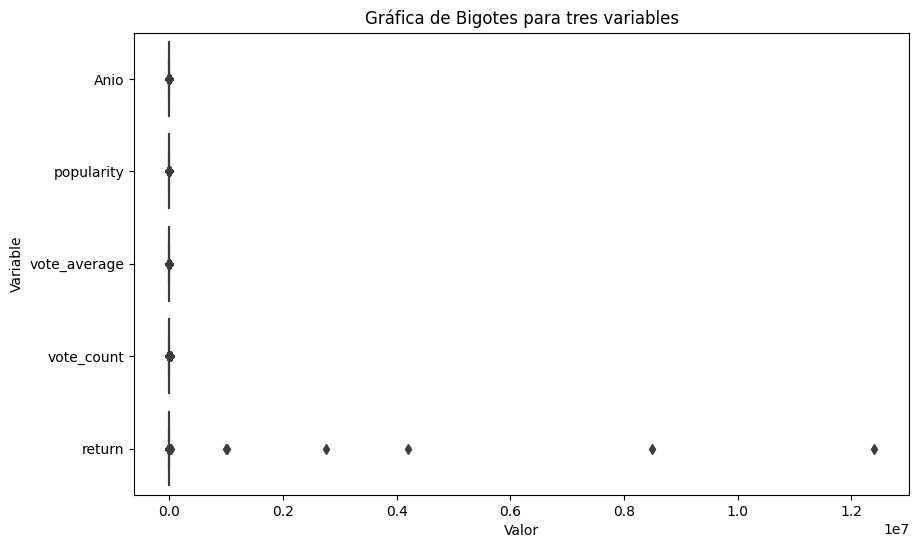

In [120]:
### Graficando las Variables 
variables = ['Anio', 'popularity','vote_average','vote_count','return']

# Crear la gráfica de bigotes para las tres variables
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.boxplot(data=df_movies[variables], orient='h', showfliers=True)  # orient='h' para gráfica horizontal
plt.xlabel('Valor')  # Etiqueta del eje x
plt.ylabel('Variable')  # Etiqueta del eje y
plt.title('Gráfica de Bigotes para tres variables')  # Título de la gráfica
plt.show()

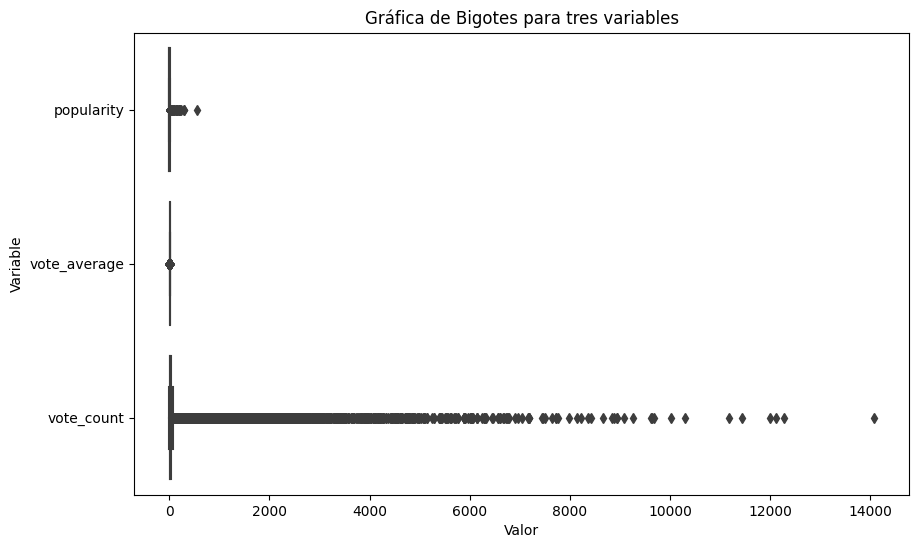

In [121]:
### Graficando las Variables 
variables = ['popularity','vote_average','vote_count']

# Crear la gráfica de bigotes para las tres variables
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.boxplot(data=df_movies[variables], orient='h', showfliers=True)  # orient='h' para gráfica horizontal
plt.xlabel('Valor')  # Etiqueta del eje x
plt.ylabel('Variable')  # Etiqueta del eje y
plt.title('Gráfica de Bigotes para tres variables')  # Título de la gráfica
plt.show()

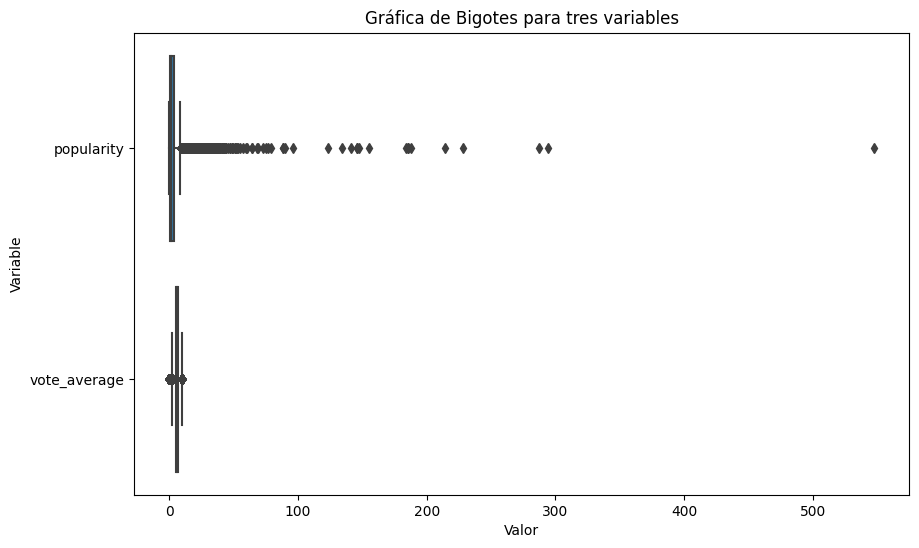

In [122]:
### Graficando las Variables 
variables = ['popularity','vote_average']

# Crear la gráfica de bigotes para las tres variables
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.boxplot(data=df_movies[variables], orient='h', showfliers=True)  # orient='h' para gráfica horizontal
plt.xlabel('Valor')  # Etiqueta del eje x
plt.ylabel('Variable')  # Etiqueta del eje y
plt.title('Gráfica de Bigotes para tres variables')  # Título de la gráfica
plt.show()

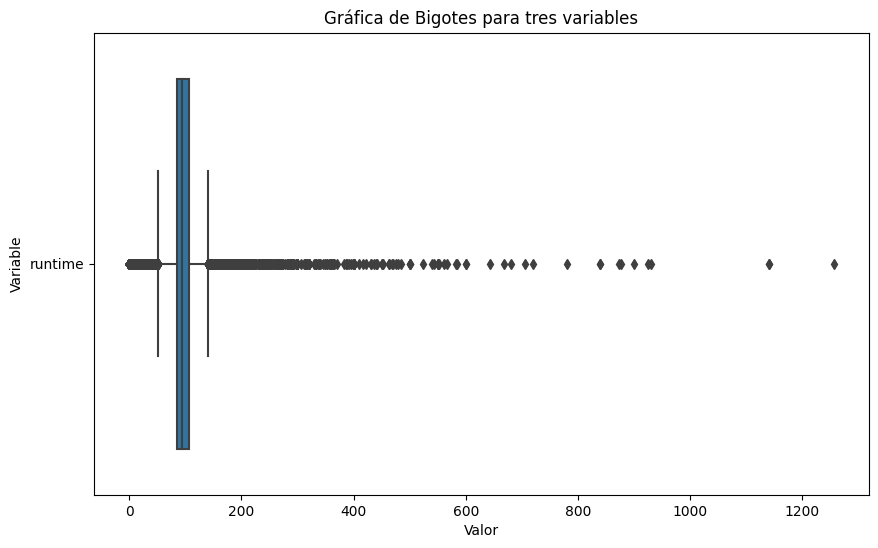

In [123]:
# Supongamos que tienes tres variables llamadas 'variable1', 'variable2' y 'variable3' en tu DataFrame df
#variables = ['vote_average', 'vote_count', 'runtime']
variables = ['runtime']

# Crear la gráfica de bigotes para las tres variables
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.boxplot(data=df_movies[variables], orient='h', showfliers=True)  # orient='h' para gráfica horizontal
plt.xlabel('Valor')  # Etiqueta del eje x
plt.ylabel('Variable')  # Etiqueta del eje y
plt.title('Gráfica de Bigotes para tres variables')  # Título de la gráfica
plt.show()

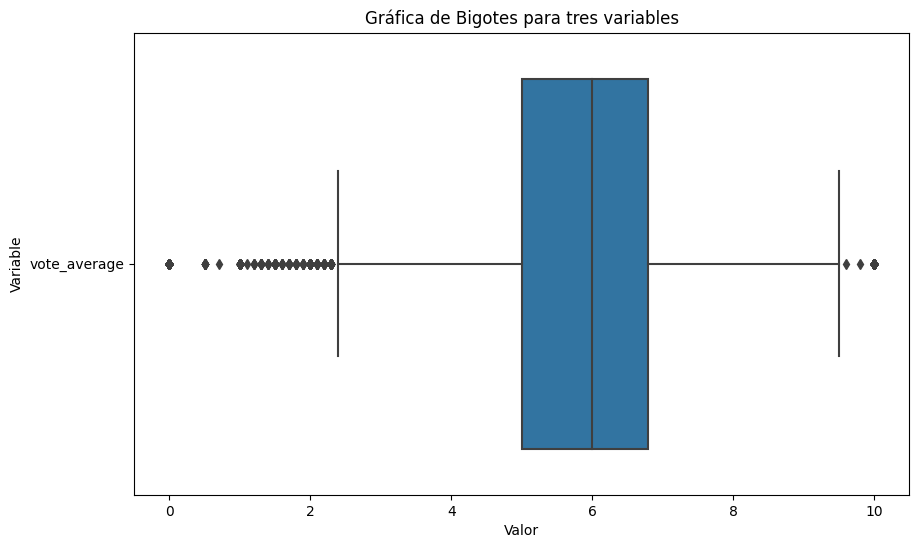

In [124]:
variables = ['vote_average']

# Crear la gráfica de bigotes para las tres variables
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.boxplot(data=df_movies[variables], orient='h', showfliers=True)  # orient='h' para gráfica horizontal
plt.xlabel('Valor')  # Etiqueta del eje x
plt.ylabel('Variable')  # Etiqueta del eje y
plt.title('Gráfica de Bigotes para tres variables')  # Título de la gráfica
plt.show()

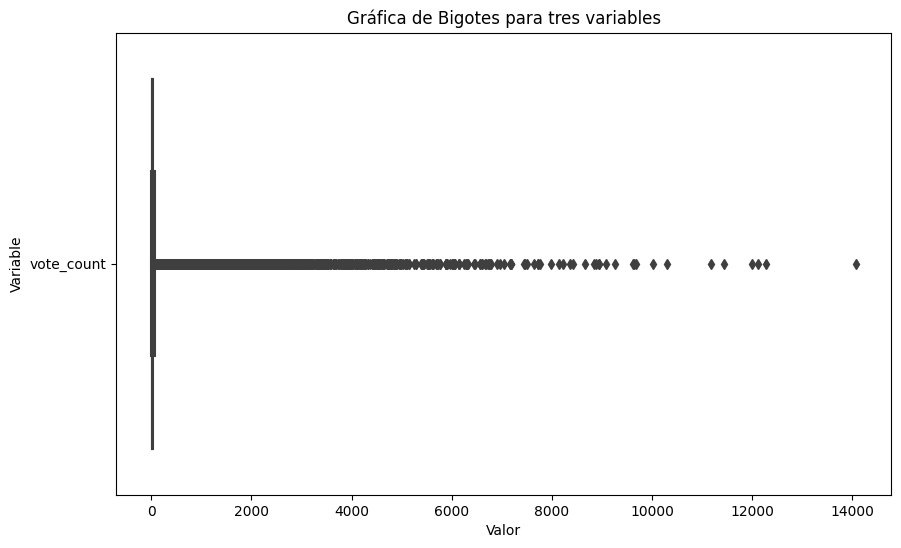

In [125]:
variables = ['vote_count']

# Crear la gráfica de bigotes para las tres variables
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.boxplot(data=df_movies[variables], orient='h', showfliers=True)  # orient='h' para gráfica horizontal
plt.xlabel('Valor')  # Etiqueta del eje x
plt.ylabel('Variable')  # Etiqueta del eje y
plt.title('Gráfica de Bigotes para tres variables')  # Título de la gráfica
plt.show()

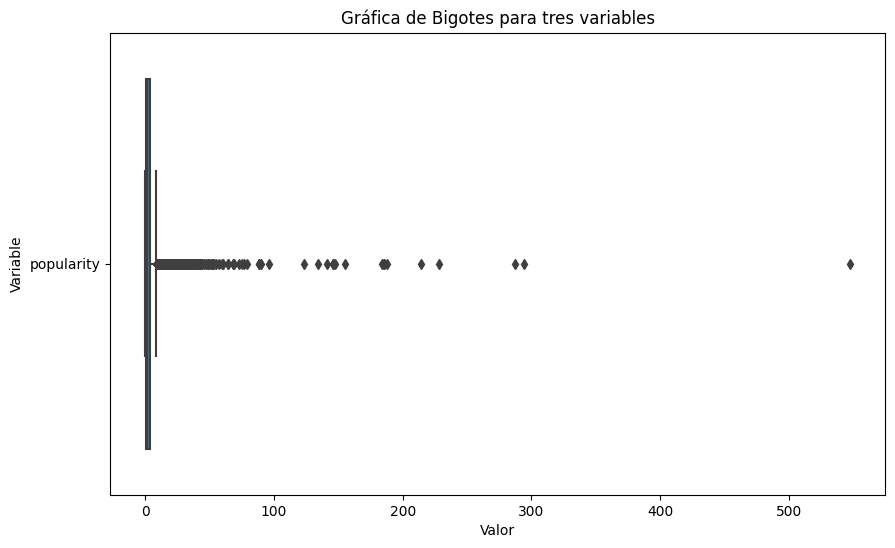

In [126]:
variables = ['popularity']

# Crear la gráfica de bigotes para las tres variables
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.boxplot(data=df_movies[variables], orient='h', showfliers=True)  # orient='h' para gráfica horizontal
plt.xlabel('Valor')  # Etiqueta del eje x
plt.ylabel('Variable')  # Etiqueta del eje y
plt.title('Gráfica de Bigotes para tres variables')  # Título de la gráfica
plt.show()

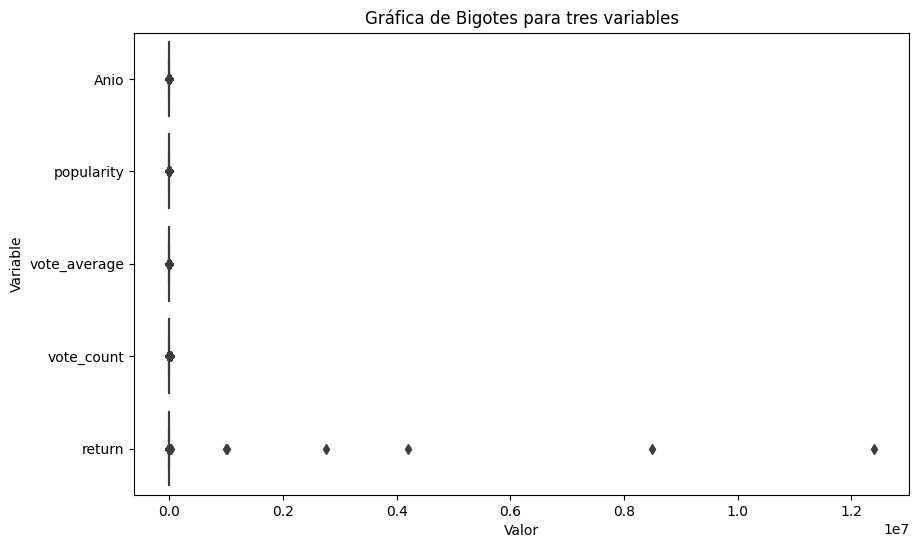

In [127]:
### Graficando las Variables 
variables = ['Anio', 'popularity','vote_average','vote_count','return']

# Crear la gráfica de bigotes para las tres variables
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.boxplot(data=df_movies[variables], orient='h', showfliers=True)  # orient='h' para gráfica horizontal
plt.xlabel('Valor')  # Etiqueta del eje x
plt.ylabel('Variable')  # Etiqueta del eje y
plt.title('Gráfica de Bigotes para tres variables')  # Título de la gráfica
plt.show()

In [128]:
df_movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,Anio,return
count,4.534500e+04,45345.000000,45345.000000,4.534500e+04,45345.000000,45345.000000,45345.000000,45345.000000,4.534500e+04
mean,4.232673e+06,108035.740479,2.926248,1.123390e+07,94.249443,5.624320,110.137722,1991.882280,6.604937e+02
std,1.744391e+07,112180.079341,6.011023,6.441058e+07,38.254068,1.915178,491.904428,24.053016,7.471882e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26390.000000,0.388826,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59852.000000,1.130269,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156597.000000,3.689610,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


### Escalado / Normalizado

### Selección de Atributos

### Ingenieria de Features

### 

# Recomendacion de Películas utilizando la Similitud del Coseno

# Modelo I

## Sistema de Recomendación con Variables Cuantitativas

In [129]:
#movie_id = 155 # ID de The Dark Knight
#movie_id = 862 # Toy Store Collection
#movie_id = 22632 # Interstellar  DIO UN ERROR
#movie_id = 26235 # Deadpool
#movie_id = 17687 # The Avengers
#movie_id = 14480 # Avatar

In [130]:
NombrePelicula = 'The Dark Knight'
movie_id = df_movies.loc[df_movies['title'] == NombrePelicula, 'id'].iloc[0]

### Variables Predictoras para la Recomendacion
features = ['vote_average', 'vote_count']     # Variables a utilizar para la recomendación

### DataSets con las caracteristicas de la película
movie_features = df_movies.loc[df_movies['id'] == movie_id, features]    # DataSets con las caracteristicas de la película

# Calcula las características de todas las películas
all_movie_features = df_movies[features]

# Calcula la similitud coseno entre la película que te gustó y todas las demás películas
similarities = cosine_similarity(movie_features, all_movie_features)

# Obtiene los índices de las películas más similares
similar_indices = similarities.argsort()[0][-6:-1]

# Obtiene los títulos de las películas más similares
similar_movies = df_movies.loc[similar_indices, 'title']

print(f"Película: {NombrePelicula}")
print(f"Id Película: {movie_id}")
print(f"Variables Predictoras en la Recomendación: {features}")
print(f"Películas Recomendadas:")
similar_movies

Película: The Dark Knight
Id Película: 155
Variables Predictoras en la Recomendación: ['vote_average', 'vote_count']
Películas Recomendadas:


17799        The Avengers
25037      Jurassic World
22838        Interstellar
18224    The Hunger Games
26517            Deadpool
Name: title, dtype: object

In [131]:
NombrePelicula = 'Deadpool'
movie_id = df_movies.loc[df_movies['title'] == NombrePelicula, 'id'].iloc[0]

### Variables Predictoras para la Recomendacion
features = ['vote_average', 'vote_count']     # Variables a utilizar para la recomendación

### DataSets con las caracteristicas de la película
movie_features = df_movies.loc[df_movies['id'] == movie_id, features]    # DataSets con las caracteristicas de la película

# Calcula las características de todas las películas
all_movie_features = df_movies[features]

# Calcula la similitud coseno entre la película que te gustó y todas las demás películas
similarities = cosine_similarity(movie_features, all_movie_features)

# Obtiene los índices de las películas más similares
similar_indices = similarities.argsort()[0][-6:-1]

# Obtiene los títulos de las películas más similares
similar_movies = df_movies.loc[similar_indices, 'title']

print(f"Película: {NombrePelicula}")
print(f"Id Película: {movie_id}")
print(f"Variables Predictoras en la Recomendación: {features}")
print(f"Películas Recomendadas:")
similar_movies

Película: Deadpool
Id Película: 293660
Variables Predictoras en la Recomendación: ['vote_average', 'vote_count']
Películas Recomendadas:


15467           Inception
18224    The Hunger Games
14540              Avatar
17799        The Avengers
12472     The Dark Knight
Name: title, dtype: object

In [132]:
NombrePelicula = 'Toy Story'
movie_id = df_movies.loc[df_movies['title'] == NombrePelicula, 'id'].iloc[0]
movie_id = 862
### Variables Predictoras para la Recomendacion
features = ['vote_average', 'vote_count']     # Variables a utilizar para la recomendación

### DataSets con las caracteristicas de la película
movie_features = df_movies.loc[df_movies['id'] == movie_id, features]    # DataSets con las caracteristicas de la película

# Calcula las características de todas las películas
all_movie_features = df_movies[features]

# Calcula la similitud coseno entre la película que te gustó y todas las demás películas
similarities = cosine_similarity(movie_features, all_movie_features)

# Obtiene los índices de las películas más similares
similar_indices = similarities.argsort()[0][-6:-1]

# Obtiene los títulos de las películas más similares
similar_movies = df_movies.loc[similar_indices, 'title']

print(f"Película: {NombrePelicula}")
print(f"Id Película: {movie_id}")
print(f"Variables Predictoras en la Recomendación: {features}")
print(f"Películas Recomendadas:")
similar_movies

Película: Toy Story
Id Película: 862
Variables Predictoras en la Recomendación: ['vote_average', 'vote_count']
Películas Recomendadas:


19049                                        Brave
832                                  The Godfather
33295                                 Wonder Woman
2511     Star Wars: Episode I - The Phantom Menace
3453                                     Gladiator
Name: title, dtype: object

### Mala Recomendacion

# Modelo II

## OneHotEncoding Manual

## Sistema de Recomendación con Variables Cualitativas

In [133]:
### Se realiza una copia del dataset
df_sr = df_movies.copy()

In [134]:
### Se procede a realizar el OneHotEncoding de la columna de Genero "genres" y estas nuevas peliculas se asignan al final del mismo datasets
features = []
for index, row in df_sr.iterrows():    # Se recorre toda la matriz
    for genre in row['Generos']:      # se buscan los generos y
        df_sr.at[index, genre] = 1    # se le coloca 1 al genero encontrado
df_sr = df_sr.fillna(0)     # En la columna que no tiene nada en el genero, se le coloca 0
df_sr

,budget,id,original_language,overview,popularity,revenue,runtime,status,tagline,title,...,D,T,h,H,S,,M,W,g,V
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,Released,0,Toy Story,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45340,0.0,30840,en,"Yet another version of the classic epic, with ...",5.683753,0.0,104.0,Released,0,Robin Hood,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45341,0.0,111109,tl,An artist struggles to finish his work while a...,0.178241,0.0,360.0,Released,0,Century of Birthing,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45342,0.0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,0.0,90.0,Released,A deadly game of wits.,Betrayal,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45343,0.0,227506,en,"In a small town live two brothers, one a minis...",0.003503,0.0,87.0,Released,0,Satan Triumphant,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
NombrePelicula = 'The Dark Knight'
movie_id = df_movies.loc[df_movies['title'] == NombrePelicula, 'id'].iloc[0]

features = ['A', 'n', 'i', 'm', 'a', 't', 'o', ',', 'C', 'e', 'd', 'y', 'F', 'l',
       'v', 'u', 'r', 's', 'R', 'c', 'D', 'T', 'h', 'H', 'S', ' ', 'M', 'W', 'g', 'V']

movie_features = df_sr.loc[df_sr['id'] == movie_id, features]

from sklearn.metrics.pairwise import cosine_similarity

# Calcula las características de todas las películas
all_movie_features = df_sr[features]

# Calcula la similitud coseno entre la película que te gustó y todas las demás películas
similarities = cosine_similarity(movie_features, all_movie_features)

# Obtiene los índices de las películas más similares
similar_indices = similarities.argsort()[0][-6:-1]

# Obtiene los títulos de las películas más similares
similar_movies = df_sr.loc[similar_indices, 'title']

print(f"Película: {NombrePelicula}")
print(f"Id Película: {movie_id}")
print(f"Variables Predictoras en la Recomendación: {features}")
print(f"Películas Recomendadas:")
similar_movies

similar_movies

Película: The Dark Knight
Id Película: 155
Variables Predictoras en la Recomendación: ['A', 'n', 'i', 'm', 'a', 't', 'o', ',', 'C', 'e', 'd', 'y', 'F', 'l', 'v', 'u', 'r', 's', 'R', 'c', 'D', 'T', 'h', 'H', 'S', ' ', 'M', 'W', 'g', 'V']
Películas Recomendadas:


9123                     Thursday
29959              Parole de flic
6873               The Real McCoy
3908                Kill Me Again
14841    The House on 92nd Street
Name: title, dtype: object

In [156]:
NombrePelicula = 'The Dark Knight'
movie_id = df_movies.loc[df_movies['title'] == NombrePelicula, 'id'].iloc[0]

features = ['Anio', 'A', 'n', 'i', 'm', 'a', 't', 'o', ',', 'C', 'e', 'd', 'y', 'F', 'l',
       'v', 'u', 'r', 's', 'R', 'c', 'D', 'T', 'h', 'H', 'S', ' ', 'M', 'W', 'g', 'V']

movie_features = df_sr.loc[df_sr['id'] == movie_id, features]

from sklearn.metrics.pairwise import cosine_similarity

# Calcula las características de todas las películas
all_movie_features = df_sr[features]

# Calcula la similitud coseno entre la película que te gustó y todas las demás películas
similarities = cosine_similarity(movie_features, all_movie_features)

# Obtiene los índices de las películas más similares
similar_indices = similarities.argsort()[0][-6:-1]

# Obtiene los títulos de las películas más similares
similar_movies = df_sr.loc[similar_indices, 'title']

print(f"Película: {NombrePelicula}")
print(f"Id Película: {movie_id}")
print(f"Variables Predictoras en la Recomendación: {features}")
print(f"Películas Recomendadas:")
similar_movies

Película: The Dark Knight
Id Película: 155
Variables Predictoras en la Recomendación: ['Anio', 'A', 'n', 'i', 'm', 'a', 't', 'o', ',', 'C', 'e', 'd', 'y', 'F', 'l', 'v', 'u', 'r', 's', 'R', 'c', 'D', 'T', 'h', 'H', 'S', ' ', 'M', 'W', 'g', 'V']
Películas Recomendadas:


12406       Vantage Point
14003            The Line
13422      Pistol Whipped
13665    Daylight Robbery
12935      Righteous Kill
Name: title, dtype: object

In [146]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45345 non-null  float64
 1   id                 45345 non-null  int64  
 2   original_language  45345 non-null  object 
 3   overview           44404 non-null  object 
 4   popularity         45345 non-null  float64
 5   revenue            45345 non-null  float64
 6   runtime            45345 non-null  float64
 7   status             45345 non-null  object 
 8   tagline            20387 non-null  object 
 9   title              45345 non-null  object 
 10  vote_average       45345 non-null  float64
 11  vote_count         45345 non-null  float64
 12  Franquicia         4485 non-null   object 
 13  Generos            45345 non-null  object 
 14  Productores        45345 non-null  object 
 15  Paises             45345 non-null  object 
 16  IdiomasH           453

In [143]:
#  df_movies['Anio'] = df_movies['Anio'].astype('object')

# Modelo III

## OneHotEncoding automático 

## Sistema de Recomendación con Variables Cualitativas

In [147]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Supongamos que tienes un DataFrame llamado df_sr con las columnas 'title', 'genre', 'director', 'protagonist', 'actor1' y 'actor2'
# Supongamos que ya tienes la lista de características codificadas 'features' como lo mencionaste.

# Nombre de la película que le gustó al usuario
NombrePelicula = 'The Dark Knight'

# Obtener el id de la película que le gustó al usuario
movie_id = df_sr.loc[df_sr['title'] == NombrePelicula, 'id'].iloc[0]

# Obteneiendo las características de las siguientes variables predictoras del Dataset
genre_features = df_sr['Generos']
director_features = df_sr['Director']
protagonist_features = df_sr['Protagonista']
actor1_features = df_sr['Actor1']
actor2_features = df_sr['Actor2']
#anio_features = df_sr['Anio']

# df['age'].astype('object')

# Concatenar todas las características
all_features = genre_features + ' ' + director_features + ' ' + protagonist_features + ' ' + actor1_features + ' ' + actor2_features

# Crear un objeto CountVectorizer para convertir las características en vectores
vectorizer = CountVectorizer(analyzer='word', lowercase=True, token_pattern=r'\w+')

# Obtener la matriz de documentos término-frecuencia (DTM) a partir de las características
all_features_matrix = vectorizer.fit_transform(all_features)

# Obtener las características de la película que le gustó al usuario
movie_features = df_sr.loc[df_sr['id'] == movie_id, 'Generos'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Director'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Protagonista'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Actor1'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Actor2'].iloc[0] 
movie_features_matrix = vectorizer.transform([movie_features])

# Calcular la similitud del coseno entre la película que le gustó al usuario y todas las demás películas
similarities = cosine_similarity(movie_features_matrix, all_features_matrix)

# Obtener los índices de las películas más similares
similar_indices = similarities.argsort()[0][-6:-1]

# Obtener los títulos de las películas más similares
similar_movies = df_sr.loc[similar_indices, 'title']
similar_movies


18728                Last Exit
11346             The Prestige
23852                Quicksand
18232    The Dark Knight Rises
10114            Batman Begins
Name: title, dtype: object

## Sistema de Recomendación con Variables Cualitativas y Cuantitativas

In [157]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Supongamos que tienes un DataFrame llamado df_sr con las columnas 'title', 'Generos', 'Director', 'Protagonista', 'Actor1', 'Actor2', 'revenue'

# Nombre de la película que le gustó al usuario
NombrePelicula = 'The Dark Knight'

# Obtener el id de la película que le gustó al usuario
movie_id = df_sr.loc[df_sr['title'] == NombrePelicula, 'id'].iloc[0]

# Obteneiendo las características de las siguientes variables predictoras del Dataset
genre_features = df_sr['Generos']
director_features = df_sr['Director']
protagonist_features = df_sr['Protagonista']
actor1_features = df_sr['Actor1']
actor2_features = df_sr['Actor2']
anio_features = df_sr['Anio'].fillna(0).astype(str)  # Convertir a cadena y llenar valores NaN con '0'

# Concatenar todas las características
all_features = genre_features + ' ' + director_features + ' ' + protagonist_features + ' ' + actor1_features + ' ' + actor2_features + ' ' + revenue_features

# Crear un objeto CountVectorizer para convertir las características en vectores
vectorizer = CountVectorizer(analyzer='word', lowercase=True, token_pattern=r'\w+')

# Obtener la matriz de documentos término-frecuencia (DTM) a partir de las características
all_features_matrix = vectorizer.fit_transform(all_features)

# Obtener las características de la película que le gustó al usuario
movie_features = df_sr.loc[df_sr['id'] == movie_id, 'Generos'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Director'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Protagonista'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Actor1'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Actor2'].iloc[0] + ' ' + anio_features.iloc[0]
movie_features_matrix = vectorizer.transform([movie_features])

# Calcular la similitud del coseno entre la película que le gustó al usuario y todas las demás películas
similarities = cosine_similarity(movie_features_matrix, all_features_matrix)

# Obtener los índices de las películas más similares
similar_indices = similarities.argsort()[0][-6:-1]

# Obtener los títulos de las películas más similares
similar_movies = df_sr.loc[similar_indices, 'title']

print(f"Película: {NombrePelicula}")
print(f"Id Película: {movie_id}")
#print(f"Variables Predictoras en la Recomendación: {features}")
print(f"Películas Recomendadas:")

similar_movies


Película: The Dark Knight
Id Película: 155
Películas Recomendadas:


6705                  Mobsters
23852                Quicksand
11346             The Prestige
18232    The Dark Knight Rises
10114            Batman Begins
Name: title, dtype: object

### Buena recomendacion

In [164]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Supongamos que tienes un DataFrame llamado df_sr con las columnas 'title', 'Generos', 'Director', 'Protagonista', 'Actor1', 'Actor2', 'revenue'

# Nombre de la película que le gustó al usuario
NombrePelicula = 'Toy Story'

# Obtener el id de la película que le gustó al usuario
movie_id = df_sr.loc[df_sr['title'] == NombrePelicula, 'id'].iloc[0]

# Obteneiendo las características de las siguientes variables predictoras del Dataset
genre_features = df_sr['Generos']
director_features = df_sr['Director']
protagonist_features = df_sr['Protagonista']
actor1_features = df_sr['Actor1']
actor2_features = df_sr['Actor2']
anio_features = df_sr['Anio'].fillna(0).astype(str)  # Convertir a cadena y llenar valores NaN con '0'

# Concatenar todas las características
all_features = genre_features + ' ' + director_features + ' ' + protagonist_features + ' ' + actor1_features + ' ' + actor2_features + ' ' + revenue_features

# Crear un objeto CountVectorizer para convertir las características en vectores
vectorizer = CountVectorizer(analyzer='word', lowercase=True, token_pattern=r'\w+')

# Obtener la matriz de documentos término-frecuencia (DTM) a partir de las características
all_features_matrix = vectorizer.fit_transform(all_features)

# Obtener las características de la película que le gustó al usuario
movie_features = df_sr.loc[df_sr['id'] == movie_id, 'Generos'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Director'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Protagonista'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Actor1'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Actor2'].iloc[0] + ' ' + anio_features.iloc[0]
movie_features_matrix = vectorizer.transform([movie_features])

# Calcular la similitud del coseno entre la película que le gustó al usuario y todas las demás películas
similarities = cosine_similarity(movie_features_matrix, all_features_matrix)

# Obtener los índices de las películas más similares
similar_indices = similarities.argsort()[0][-6:-1]

# Obtener los títulos de las películas más similares
similar_movies = df_sr.loc[similar_indices, 'title']

print(f"Película: {NombrePelicula}")
print(f"Id Película: {movie_id}")
#print(f"Variables Predictoras en la Recomendación: {features}")
print(f"Películas Recomendadas:")

similar_movies


Película: Toy Story
Id Película: 862
Películas Recomendadas:


25753    Toy Story That Time Forgot
25751               Partysaurus Rex
21891          Toy Story of Terror!
15335                   Toy Story 3
2994                    Toy Story 2
Name: title, dtype: object

In [ ]:
#movie_id = 155 # ID de The Dark Knight
#movie_id = 862 # Toy Store Collection
#movie_id = 22632 # Interstellar  DIO UN ERROR
#movie_id = 26235 # Deadpool
#movie_id = 17687 # The Avengers
#movie_id = 14480 # Avatar

## FUNCION Nro 6. Recomendacion de las Películas

In [167]:
# ML
#@app.get('/recomendacion/{titulo}')
def recomendacion(titulo:str):
    '''Ingresas la productora, entregandote el revenue total y la cantidad de peliculas que realizo '''
    try:
        # Obtener el id de la película que le gustó al usuario
        movie_id = df_movies.loc[df_movies['title'] == titulo, 'id'].iloc[0]
        
        # Obteneiendo las características de las siguientes variables predictoras del Dataset
        genre_features = df_movies['Generos']
        director_features = df_movies['Director']
        protagonist_features = df_sr['Protagonista']
        actor1_features = df_movies['Actor1']
        actor2_features = df_movies['Actor2']
        anio_features = df_movies['Anio'].fillna(0).astype(str)  # Convertir a cadena y llenar valores NaN con '0'
        
        # Concatenar todas las características
        all_features = genre_features + ' ' + director_features + ' ' + protagonist_features + ' ' + actor1_features + ' ' + actor2_features + ' ' + revenue_features

        # Crear un objeto CountVectorizer para convertir las características en vectores
        vectorizer = CountVectorizer(analyzer='word', lowercase=True, token_pattern=r'\w+')

        # Obtener la matriz de documentos término-frecuencia (DTM) a partir de las características
        all_features_matrix = vectorizer.fit_transform(all_features)

        # Obtener las características de la película que le gustó al usuario
        movie_features = df_sr.loc[df_movies['id'] == movie_id, 'Generos'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Director'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Protagonista'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Actor1'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Actor2'].iloc[0] + ' ' + anio_features.iloc[0]
        movie_features_matrix = vectorizer.transform([movie_features])

        # Calcular la similitud del coseno entre la película que le gustó al usuario y todas las demás películas
        similarities = cosine_similarity(movie_features_matrix, all_features_matrix)

        # Obtener los índices de las películas más similares
        similar_indices = similarities.argsort()[0][-6:-1]

        # Obtener los títulos de las películas más similares
        similar_movies = df_movies.loc[similar_indices, 'title'] 
        
    except (ValueError, SyntaxError):
        pass 
    return {'lista recomendada': similar_movies}


### Probando la funcón::
Titulo = 'The Way of the Dragon'
Respuesta = recomendacion(Titulo)
print(Respuesta) 

{'lista recomendada': 7297     Enter the Dragon
2762      Double Jeopardy
19276      I Am Bruce Lee
4305         Fist of Fury
4308        Game of Death
Name: title, dtype: object}


### Backup en Disco del Dataset Resultante

In [175]:
### Se resetean los indices
df_movies.reset_index(drop=True, inplace=True)

### Se procede a realizar Backup en disco para utilizar el Dataset el subir en Render.
df_movies.to_csv('../DataSetPI-Cleaning/df_movies.csv', index=False, header=True, sep=';')   # Pesa 25 MB

In [183]:
df_sr.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'revenue', 'runtime', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'Franquicia', 'Generos', 'Productores', 'Paises',
       'IdiomasH', 'Anio', 'return', 'Protagonista', 'Actor1', 'Actor2',
       'Director', 'A', 'n', 'i', 'm', 'a', 't', 'o', ',', 'C', 'e', 'd', 'y',
       'F', 'l', 'v', 'u', 'r', 's', 'R', 'c', 'D', 'T', 'h', 'H', 'S', ' ',
       'M', 'W', 'g', 'V'],
      dtype='object')

In [184]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Supongamos que tienes un DataFrame llamado df_sr con las columnas 'title', 'Generos', 'Director', 'Protagonista', 'Actor1', 'Actor2', 'revenue'

# Nombre de la película que le gustó al usuario
NombrePelicula = 'Toy Story'

# Obtener el id de la película que le gustó al usuario
movie_id = df_sr.loc[df_sr['title'] == NombrePelicula, 'id'].iloc[0]

# Obteneiendo las características de las siguientes variables predictoras del Dataset
genre_features = df_sr['Generos']
director_features = df_sr['Director']
protagonist_features = df_sr['Protagonista']
actor1_features = df_sr['Actor1']
actor2_features = df_sr['Actor2']
anio_features = df_sr['popularity'].fillna(0).astype(str)  # Convertir a cadena y llenar valores NaN con '0'

# Concatenar todas las características
all_features = genre_features + ' ' + director_features + ' ' + protagonist_features + ' ' + actor1_features + ' ' + actor2_features + ' ' + revenue_features

# Crear un objeto CountVectorizer para convertir las características en vectores
vectorizer = CountVectorizer(analyzer='word', lowercase=True, token_pattern=r'\w+')

# Obtener la matriz de documentos término-frecuencia (DTM) a partir de las características
all_features_matrix = vectorizer.fit_transform(all_features)

# Obtener las características de la película que le gustó al usuario
movie_features = df_sr.loc[df_sr['id'] == movie_id, 'Generos'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Director'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Protagonista'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Actor1'].iloc[0] + ' ' + df_sr.loc[df_sr['id'] == movie_id, 'Actor2'].iloc[0] + ' ' + anio_features.iloc[0]
movie_features_matrix = vectorizer.transform([movie_features])

# Calcular la similitud del coseno entre la película que le gustó al usuario y todas las demás películas
similarities = cosine_similarity(movie_features_matrix, all_features_matrix)

# Obtener los índices de las películas más similares
similar_indices = similarities.argsort()[0][-6:-1]

# Obtener los títulos de las películas más similares
similar_movies = df_sr.loc[similar_indices, 'title']

print(f"Película: {NombrePelicula}")
print(f"Id Película: {movie_id}")
#print(f"Variables Predictoras en la Recomendación: {features}")
print(f"Películas Recomendadas:")

similar_movies

Película: Toy Story
Id Película: 862
Películas Recomendadas:


25753    Toy Story That Time Forgot
25751               Partysaurus Rex
21891          Toy Story of Terror!
2994                    Toy Story 2
15335                   Toy Story 3
Name: title, dtype: object